# Comparative Analysis: October & August FIND underlying data

In [ ]:
#installing packages that are not already supported in anacanda
! pip3 install boto3

In [531]:
#import packages
import pandas as pd
import datacompy as dc
import os
import seaborn as sns
import numpy as np

In [226]:
#set standards for nice visualizations & formatting

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import requests
import boto3
import io
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
#colorlist = ['#000000','#0C6B0C',  "#082B84", "#3F1D63",'#086984',"#C91414", "#FF6D00",'#D9B81F' ] 

#***************************
# Set dimensions for visualizations
#***************************

figure_size =  (15,8)
barfigsize = (11,6)
barwidth = 0.6
font_size_var = 2.5
label_size= 20
axis_pad = 15



def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)



# Import and Deduplication

In [539]:
#read in Aug data
df_Aug = pd.read_excel ("C:\\Users\\bthrift\\Documents\\Projects\\NGS Map\\NGS underlying data\\Python\\NGS_underlying_data_Aug.xlsx")
df_Aug['month'] = 'August'
df_Aug.drop('geometry', inplace=True, axis=1)
df_Aug.head(3)

,country,code,region,who_testing_capacity,owid_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,...,sars_cov_2_sequencing,cases_newly_reported_in_last_7_days_per_100000_population,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean,month
0,Abyei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unreliable testing capacity,...,0 sequences,NaN,NaN,1 - Test,Test,– Increase diagnostic testing capacity,Unreliable testing capacity,0 NGS facilities or equivalent,0 sequences,August
1,Abyei Disputed Boundary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unreliable testing capacity,...,0 sequences,NaN,NaN,1 - Test,Test,– Increase diagnostic testing capacity,Unreliable testing capacity,0 NGS facilities or equivalent,0 sequences,August
2,Abyei Disputed Boundary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unreliable testing capacity,...,0 sequences,NaN,NaN,1 - Test,Test,– Increase diagnostic testing capacity,Unreliable testing capacity,0 NGS facilities or equivalent,0 sequences,August


In [540]:
print ("num of columns:", df_Aug.columns.nunique())
print ("shape:", df_Aug.shape)
print ("num of unique countries:", df_Aug.country.nunique())

num of columns: 28
shape: (268, 28)
num of unique countries: 252


In [727]:
# assessing duplicates in country
print("num of country dups:", df_Aug.duplicated(subset=['country']).sum())

#Drop countries with Nan country_code
df_Aug_clean_countries = df_Aug[df_Aug['code'].notna()]

print("shape of original August data:", df_Aug.shape)
print ("shape of country_code cleaned August data:", df_Aug_clean_countries.shape)

# assessing duplicates in country codes
print("num of country dups:", df_Aug_clean_countries.duplicated(subset=['country']).sum())
df_Aug_clean_countries.drop_duplicates(subset = ['code'], inplace=True)

print ("num of unique countries, after cleaning codes:", df_Aug_clean_countries.country.nunique())
df_Aug_clean_countries.head(3)
#Dropped about 14 countries when assessing countries without country codes

num of country dups: 16
shape of original August data: (268, 28)
shape of country_code cleaned August data: (248, 28)
num of country dups: 10
num of unique countries, after cleaning codes: 237


<ipython-input-727-5b50a498df8a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Aug_clean_countries.drop_duplicates(subset = ['code'], inplace=True)


,country,code,region,who_testing_capacity,owid_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,...,sars_cov_2_sequencing,cases_newly_reported_in_last_7_days_per_100000_population,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean,month
4,Afghanistan,AFG,Eastern Mediterranean,1.0,1.0,389.28,10.65,1883.271681,0.206737,Reliable testing capacity,...,1-499 sequences,25.42,Low income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,August
8,Albania,ALB,Europe,1.0,1.0,28.78,123.74,32811.535789,0.142708,Reliable testing capacity,...,1-499 sequences,1.25,Upper middle income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,August
9,Algeria,DZA,Africa,1.0,1.0,438.51,4.46,525.764521,0.802601,Reliable testing capacity,...,1-499 sequences,7.77,Lower middle income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,August


In [542]:
#reading in the Oct data
df_Oct = pd.read_csv ('C:\\Users\\bthrift\\Documents\\Projects\\NGS Map\\NGS underlying data\\Python\\NGS_underlying_data_Oct.csv')
df_Oct['month'] = 'October'
df_Oct.drop('geometry', inplace=True, axis=1)
df_Oct.head(3)

,country,code,region,who_testing_capacity,owid_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,...,cases_newly_reported_in_last_7_days_per_100000_population,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean,archetype_clean,month
0,Abyei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unreliable testing capacity,...,NaN,NaN,1 - Test,Test,� Increase diagnostic testing capacity,Unreliable testing capacity,0 NGS facilities or equivalent,0 sequences,Test,October
1,Abyei Disputed Boundary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unreliable testing capacity,...,NaN,NaN,1 - Test,Test,� Increase diagnostic testing capacity,Unreliable testing capacity,0 NGS facilities or equivalent,0 sequences,Test,October
2,Abyei Disputed Boundary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unreliable testing capacity,...,NaN,NaN,1 - Test,Test,� Increase diagnostic testing capacity,Unreliable testing capacity,0 NGS facilities or equivalent,0 sequences,Test,October


In [543]:
# look at num of columns and shapes
print ("num of columns:", df_Oct.columns.nunique())
print ("shape:", df_Oct.shape)
print ("num of unique countries:", df_Oct.country.nunique())

num of columns: 29
shape: (266, 29)
num of unique countries: 252


In [728]:
# assessing duplicates in country
print("num of country dups:", df_Oct.duplicated(subset=['country']).sum())

#Drop countries with Nan country_code
df_Oct_clean_countries = df_Oct[df_Oct['code'].notna()]

print("shape of original August data:", df_Oct.shape)
print ("shape of country_code cleaned August data:", df_Oct_clean_countries.shape)

# assessing duplicates in country codes
print("num of country dups:", df_Oct_clean_countries.duplicated(subset=['country']).sum())
df_Oct_clean_countries.drop_duplicates(subset = ['code'], inplace=True)

print ("num of unique countries, after cleaning codes:", df_Oct_clean_countries.country.nunique())
df_Oct_clean_countries.head(3)
#Dropped about 14 countries when assessing countries without country codes

num of country dups: 14
shape of original August data: (266, 29)
shape of country_code cleaned August data: (246, 29)
num of country dups: 8
num of unique countries, after cleaning codes: 237


<ipython-input-728-167f3d7498e3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Oct_clean_countries.drop_duplicates(subset = ['code'], inplace=True)


,country,code,region,who_testing_capacity,owid_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,...,cases_newly_reported_in_last_7_days_per_100000_population,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean,archetype_clean,month
4,Afghanistan,AFG,Eastern Mediterranean,1 - Reliable,0.0,389.28,10.65,1970.843609,0.203075,Reliable testing capacity,...,0.63,Low income,2 - Connect,Connect,� Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,Connect,October
8,Albania,ALB,Europe,1 - Reliable,1.0,28.78,190.16,43816.504517,0.141791,Reliable testing capacity,...,103.62,Upper middle income,2 - Connect,Connect,� Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,Connect,October
9,Algeria,DZA,Africa,1 - Reliable,1.0,438.51,4.46,525.764521,0.891131,Reliable testing capacity,...,1.66,Lower middle income,2 - Connect,Connect,� Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,Connect,October


In [729]:
print (df_Aug_clean_countries.columns.unique())
print (df_Oct_clean_countries.columns.unique())

#Note: archetype_clean is a variable in October months and not in August

Index(['country', 'code', 'region', 'who_testing_capacity',
       'owid_testing_capacity', 'pop_100k', 'max_new_tests_cap_avg',
       'cap_cum_tests', 'cum_tpr', 'dx_testing_capacity', 'ngs_capacity',
       'sequencing_capacity', 'total_sequences', 'submission_count',
       'total_viable_sequences', 'all_cases', 'percent_cases_sequenced',
       'sequences_per_capita_per_100k', 'sars_cov_2_sequencing',
       'cases_newly_reported_in_last_7_days_per_100000_population',
       'world_bank_economies', 'archetype_full', 'archetype', 'label',
       'dx_testing_capacity_clean', 'sequencing_capacity_clean',
       'sars_cov_2_sequencing_clean', 'month'],
      dtype='object')
Index(['country', 'code', 'region', 'who_testing_capacity',
       'owid_testing_capacity', 'pop_100k', 'max_new_tests_cap_avg',
       'cap_cum_tests', 'cum_tpr', 'dx_testing_capacity', 'ngs_capacity',
       'sequencing_capacity', 'total_sequences', 'submission_count',
       'total_viable_sequences', 'all_cases'

# Exploring Data Completeness

Results ~ Data completeness Notes:
- August & Oct missing data were consistent between the two datasets, except for
"newly reported cases in last 7 days per 100K population"
- 100% missing data for newly reported cases in Aug
- 10% missing data for newly reported cases in Oct

In [731]:
print (df_Aug_clean_countries.shape)
print (df_Oct_clean_countries.shape)
# Note: August month does not have archetype_clean variable

(237, 28)
(237, 29)


In [733]:
print ("num of na in WHO testing cap, aug dataset:", df_Aug_clean_countries.who_testing_capacity.isna().sum())
print ("num of na in WHO testing cap, oct dataset:", df_Oct_clean_countries.who_testing_capacity.isna().sum())

print ("% of missing data for WHO testing cap:", 20/237 *100)

num of na in WHO testing cap, aug dataset: 20
num of na in WHO testing cap, oct dataset: 20
% of missing data for WHO testing cap: 8.438818565400844


In [735]:
print ("num of na in OWID testing cap, aug dataset:", df_Aug_clean_countries.owid_testing_capacity.isna().sum())
print ("num of na in OWID testing cap, oct dataset:", df_Oct_clean_countries.owid_testing_capacity.isna().sum())

print ("% of missing data for OWID testing cap:", 53/237 *100)

num of na in OWID testing cap, aug dataset: 53
num of na in OWID testing cap, oct dataset: 53
% of missing data for OWID testing cap: 22.362869198312236


In [737]:
print ("num of na in pop, aug dataset:", df_Aug_clean_countries.pop_100k.isna().sum())
print ("num of na in pop, oct dataset:", df_Oct_clean_countries.pop_100k.isna().sum())

print ("% of missing data for pop:", 41/237 *100)

num of na in pop, aug dataset: 41
num of na in pop, oct dataset: 42
% of missing data for pop: 17.29957805907173


In [739]:
print ("num of na in max new tests, aug dataset:", df_Aug_clean_countries.max_new_tests_cap_avg.isna().sum())
print ("num of na in max new tests, oct dataset:", df_Oct_clean_countries.max_new_tests_cap_avg.isna().sum())

print ("% of missing data for max new tests:", 56/237 *100)

num of na in max new tests, aug dataset: 56
num of na in max new tests, oct dataset: 57
% of missing data for max new tests: 23.628691983122362


In [741]:
print ("num of na capacity cum tests in aug dataset:", df_Aug_clean_countries.cap_cum_tests.isna().sum())
print ("num of na capacity cum tests in oct dataset:", df_Oct_clean_countries.cap_cum_tests.isna().sum())

print ("% of missing data for cum tests:", 41/237 *100)

num of na capacity cum tests in aug dataset: 41
num of na capacity cum tests in oct dataset: 42
% of missing data for cum tests: 17.29957805907173


In [743]:
print ("num of na cum tpr in aug dataset:", df_Aug_clean_countries.cum_tpr.isna().sum())
print ("num of na cum tpr in oct dataset:", df_Oct_clean_countries.cum_tpr.isna().sum())

print ("% of missing data for cum tpr:", 63/237 *100)

num of na cum tpr in aug dataset: 63
num of na cum tpr in oct dataset: 66
% of missing data for cum tpr: 26.582278481012654


In [744]:
print ("num of na dx testing in aug dataset:", df_Aug_clean_countries.dx_testing_capacity.isna().sum())
print ("num of na dx testing in oct dataset:", df_Oct_clean_countries.dx_testing_capacity.isna().sum())

num of na dx testing in aug dataset: 0
num of na dx testing in oct dataset: 0


In [746]:
print ("num of na ngs capacity in aug dataset:", df_Aug_clean_countries.ngs_capacity.isna().sum())
print ("num of na ngs capacity in oct dataset:", df_Oct_clean_countries.ngs_capacity.isna().sum())

print ("% of missing data for ngs cap:", 129/237 *100)

num of na ngs capacity in aug dataset: 129
num of na ngs capacity in oct dataset: 129
% of missing data for ngs cap: 54.43037974683544


In [747]:
print ("num of na in sequencing cap, aug dataset:", df_Aug_clean_countries.sequencing_capacity.isna().sum())
print ("num of na in sequencing cap, oct dataset:", df_Oct_clean_countries.sequencing_capacity.isna().sum())

num of na in sequencing cap, aug dataset: 0
num of na in sequencing cap, oct dataset: 0


In [591]:
print ("num of na total sequencing in aug dataset:", df_Aug_clean_countries.total_sequences.isna().sum())
print ("num of na total sequencing in oct dataset:", df_Oct_clean_countries.total_sequences.isna().sum())

num of na total sequencing in aug dataset: 0
num of na total sequencing in oct dataset: 0


In [748]:
print ("num of na submission count in aug dataset:", df_Aug_clean_countries.submission_count.isna().sum())
print ("num of na submission count in oct dataset:", df_Oct_clean_countries.submission_count.isna().sum())

num of na submission count in aug dataset: 0
num of na submission count in oct dataset: 0


In [750]:
print ("num of na total viable sequences in aug dataset:", df_Aug_clean_countries.total_viable_sequences.isna().sum())
print ("num of na total viable sequences in oct dataset:", df_Oct_clean_countries.total_viable_sequences.isna().sum())

print ("% of missing data for viable seq:", 17/237 *100)

num of na total viable sequences in aug dataset: 18
num of na total viable sequences in oct dataset: 17
% of missing data for viable seq: 7.172995780590717


In [752]:
print ("num of na for all cases in aug dataset:", df_Aug_clean_countries.all_cases.isna().sum())
print ("num of na for all cases in oct dataset:", df_Oct_clean_countries.all_cases.isna().sum())

print ("% of missing data for all cases:", 17/237 *100)

num of na for all cases in aug dataset: 18
num of na for all cases in oct dataset: 17
% of missing data for all cases: 7.172995780590717


In [754]:
print ("num of na for percent of cases sequenced in aug dataset:", df_Aug_clean_countries.percent_cases_sequenced.isna().sum())
print ("num of na for percent of cases sequenced in oct dataset:", df_Oct_clean_countries.percent_cases_sequenced.isna().sum())

print ("% of missing data for percent of cases seq:", 47/237 *100)

num of na for percent of cases sequenced in aug dataset: 48
num of na for percent of cases sequenced in oct dataset: 47
% of missing data for percent of cases seq: 19.831223628691983


In [756]:
print ("num of na sequences per 100K in aug dataset:", df_Aug_clean_countries.sequences_per_capita_per_100k.isna().sum())
print ("num of na sequences per 100K in oct dataset:", df_Oct_clean_countries.sequences_per_capita_per_100k.isna().sum())

print ("% of missing data for seq per 100K:", 21/237 *100)

num of na sequences per 100K in aug dataset: 20
num of na sequences per 100K in oct dataset: 22
% of missing data for seq per 100K: 8.860759493670885


In [603]:
print ("num of na SARS CoV sequencing in aug dataset:", df_Aug_clean_countries.sars_cov_2_sequencing.isna().sum())
print ("num of na SARS CoV sequencing in oct dataset:", df_Oct_clean_countries.sars_cov_2_sequencing.isna().sum())

num of na SARS CoV sequencing in aug dataset: 0
num of na SARS CoV sequencing in oct dataset: 0


In [758]:
print ("num of na in newly reported cases in 7 days, aug dataset:", df_Aug_clean_countries.cases_newly_reported_in_last_7_days_per_100000_population.isna().sum())
print ("num of na in newly reported cases in 7 days, oct dataset:", df_Oct_clean_countries.cases_newly_reported_in_last_7_days_per_100000_population.isna().sum())

print ("% of missing data for newly reported cases:", 12/237 *100)

num of na in newly reported cases in 7 days, aug dataset: 12
num of na in newly reported cases in 7 days, oct dataset: 12
% of missing data for newly reported cases: 5.063291139240507


In [760]:
print ("num of na world_bank_economies in aug dataset:", df_Aug_clean_countries.world_bank_economies.isna().sum())
print ("num of na world_bank_economies in oct dataset:", df_Oct_clean_countries.world_bank_economies.isna().sum())

print ("% of missing data for world bank econ:", 20/237 *100)

num of na world_bank_economies in aug dataset: 20
num of na world_bank_economies in oct dataset: 20
% of missing data for world bank econ: 8.438818565400844


In [761]:
print ("num of na archetype_full in aug dataset:", df_Aug_clean_countries.archetype_full.isna().sum())
print ("num of na archetype_full in oct dataset:", df_Oct_clean_countries.archetype_full.isna().sum())

num of na archetype_full in aug dataset: 0
num of na archetype_full in oct dataset: 0


In [762]:
print ("num of na archetype in aug dataset:", df_Aug_clean_countries.archetype.isna().sum())
print ("num of na archetype in oct dataset:", df_Oct_clean_countries.archetype.isna().sum())

num of na archetype in aug dataset: 0
num of na archetype in oct dataset: 0


In [764]:
print ("num of na label in aug dataset:", df_Aug_clean_countries.label.isna().sum())
print ("num of na label in oct dataset:", df_Oct_clean_countries.label.isna().sum())

print ("% of missing data for label:", 84/237 *100)

num of na label in aug dataset: 84
num of na label in oct dataset: 84
% of missing data for label: 35.44303797468354


In [765]:
print ("num of na dx_testing_capacity_clean in aug dataset:", df_Aug_clean_countries.dx_testing_capacity_clean.isna().sum())
print ("num of na dx_testing_capacity_clean in oct dataset:", df_Oct_clean_countries.dx_testing_capacity_clean.isna().sum())

num of na dx_testing_capacity_clean in aug dataset: 0
num of na dx_testing_capacity_clean in oct dataset: 0


In [766]:
print ("num of na sequencing_capacity_clean in aug dataset:", df_Aug_clean_countries.sequencing_capacity_clean.isna().sum())
print ("num of na sequencing_capacity_clean in oct dataset:", df_Oct_clean_countries.sequencing_capacity_clean.isna().sum())

num of na sequencing_capacity_clean in aug dataset: 0
num of na sequencing_capacity_clean in oct dataset: 0


In [767]:
print ("num of na sars_cov_2_sequencing_clean in aug dataset:", df_Aug_clean_countries.sars_cov_2_sequencing_clean.isna().sum())
print ("num of na sars_cov_2_sequencing_clean in oct dataset:", df_Oct_clean_countries.sars_cov_2_sequencing_clean.isna().sum())

num of na sars_cov_2_sequencing_clean in aug dataset: 0
num of na sars_cov_2_sequencing_clean in oct dataset: 0


# Transformation: Assess only LMICs

In [952]:
LMIC_Aug = df_Aug_clean_countries[df_Aug_clean_countries.country.isin([
    'Afghanistan','Guinea-Bissau', 'Somalia'
    'Burkina Faso', "Korea Dem. People's Rep" , 'South Sudan',
    'Burundi', 'Liberia', 'Sudan',
    'Central African Republic', 'Madagascar', 'Chad', 'Malawi', 'Togo',
    'Democratic Republic of the Congo', 'Mali', 'Uganda',
    'Mozambique','Ethiopia', 'Niger', 
    'Gambia, The', 'Rwanda', 
    'Guinea', 'Sierra Leone', 'Angola','Honduras', 'Philippines',
    'Algeria', 'India', 'Samoa','Bangladesh', 'Indonesia',
    'Belize', 'Iran', 'Senegal', 'Benin', 'Kenya', 'Solomon Islands',
    'Sri Lanka','Bolivia','Tanzania','Cabo Verde', 'Laos','Cambodia', 
    'Lesotho', 'Timor-Leste','Cameroon', 'Tunisia', 'Comoros', 'Ukraine', 
    'Republic of the Congo', 'Mongolia', 'Uzbekistan',"Côte d'Ivoire", 
    'Morocco', 'Vanuatu','Djibouti', 'Myanmar', 'Vietnam','Egypt', 'Nepal', 
    'El Salvador', 'Zambia','Eswatini', 'Nigeria', 'Zimbabwe','Ghana',
    'Pakistan', 'Haiti', 'Papua New Guinea'])]
print ("LMICs:",LMIC_Aug.country.unique())
LMIC_Aug.head(3)

LMICs: ['Afghanistan' 'Algeria' 'Angola' 'Bangladesh' 'Belize' 'Benin' 'Bolivia'
 'Burundi' 'Cambodia' 'Cameroon' 'Central African Republic' 'Chad'
 'Comoros' 'Democratic Republic of the Congo' 'Djibouti' 'Egypt'
 'El Salvador' 'Eswatini' 'Ethiopia' 'Ghana' 'Guinea' 'Guinea-Bissau'
 'Haiti' 'Honduras' 'India' 'Indonesia' 'Iran' 'Kenya' 'Laos' 'Lesotho'
 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mongolia' 'Morocco' 'Mozambique'
 'Myanmar' 'Nepal' 'Niger' 'Nigeria' 'Pakistan' 'Papua New Guinea'
 'Philippines' 'Republic of the Congo' 'Rwanda' 'Samoa' 'Senegal'
 'Sierra Leone' 'Solomon Islands' 'South Sudan' 'Sri Lanka' 'Sudan'
 'Tanzania' 'Togo' 'Tunisia' 'Uganda' 'Ukraine' 'Uzbekistan' 'Vanuatu'
 'Vietnam' 'Zambia' 'Zimbabwe']


,country,code,region,who_testing_capacity,owid_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,...,sars_cov_2_sequencing,cases_newly_reported_in_last_7_days_per_100000_population,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean,month
4,Afghanistan,AFG,Eastern Mediterranean,1.0,1.0,389.28,10.65,1883.271681,0.206737,Reliable testing capacity,...,1-499 sequences,25.42,Low income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,August
9,Algeria,DZA,Africa,1.0,1.0,438.51,4.46,525.764521,0.802601,Reliable testing capacity,...,1-499 sequences,7.77,Lower middle income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,August
12,Angola,AGO,Africa,1.0,1.0,328.66,16.29,2577.064443,0.052155,Reliable testing capacity,...,500+ sequences,1.95,Lower middle income,3 - Leverage,Leverage,– Leverage existing NGS capacity,Reliable testing capacity,0 NGS facilities or equivalent,500+ sequences,August


In [949]:
LMIC_Oct = df_Oct_clean_countries[df_Oct_clean_countries.country.isin([
    'Afghanistan','Guinea-Bissau', 'Somalia'
    'Burkina Faso', "Korea Dem. People's Rep" , 'South Sudan',
    'Burundi', 'Liberia', 'Sudan',
    'Central African Republic', 'Madagascar', 'Chad', 'Malawi', 'Togo',
    'Democratic Republic of the Congo', 'Mali', 'Uganda',
    'Mozambique','Ethiopia', 'Niger', 
    'Gambia, The', 'Rwanda', 
    'Guinea', 'Sierra Leone', 'Angola','Honduras', 'Philippines',
    'Algeria', 'India', 'Samoa','Bangladesh', 'Indonesia',
    'Belize', 'Iran', 'Senegal', 'Benin', 'Kenya', 'Solomon Islands',
    'Sri Lanka','Bolivia','Tanzania','Cabo Verde', 'Laos','Cambodia', 
    'Lesotho', 'Timor-Leste','Cameroon', 'Tunisia', 'Comoros', 'Ukraine', 
    'Republic of the Congo', 'Mongolia', 'Uzbekistan',"Côte d'Ivoire", 
    'Morocco', 'Vanuatu','Djibouti', 'Myanmar', 'Vietnam','Egypt', 'Nepal', 
    'El Salvador', 'Zambia','Eswatini', 'Nigeria', 'Zimbabwe','Ghana',
    'Pakistan', 'Haiti', 'Papua New Guinea'])]
print ("LMICs:",LMIC_Oct.country.unique())
LMIC_Oct.head(3)

LMICs: ['Afghanistan' 'Algeria' 'Angola' 'Bangladesh' 'Belize' 'Benin' 'Bolivia'
 'Burundi' 'Cambodia' 'Cameroon' 'Central African Republic' 'Chad'
 'Comoros' 'Democratic Republic of the Congo' 'Djibouti' 'Egypt'
 'El Salvador' 'Eswatini' 'Ethiopia' 'Ghana' 'Guinea' 'Guinea-Bissau'
 'Haiti' 'Honduras' 'India' 'Indonesia' 'Iran' 'Kenya' 'Laos' 'Lesotho'
 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mongolia' 'Morocco' 'Mozambique'
 'Myanmar' 'Nepal' 'Niger' 'Nigeria' 'Pakistan' 'Papua New Guinea'
 'Philippines' 'Republic of the Congo' 'Rwanda' 'Samoa' 'Senegal'
 'Sierra Leone' 'Solomon Islands' 'South Sudan' 'Sri Lanka' 'Sudan'
 'Tanzania' 'Togo' 'Tunisia' 'Uganda' 'Ukraine' 'Uzbekistan' 'Vanuatu'
 'Vietnam' 'Zambia' 'Zimbabwe']


,country,code,region,who_testing_capacity,owid_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,...,cases_newly_reported_in_last_7_days_per_100000_population,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean,archetype_clean,month
4,Afghanistan,AFG,Eastern Mediterranean,1 - Reliable,0.0,389.28,10.65,1970.843609,0.203075,Reliable testing capacity,...,0.63,Low income,2 - Connect,Connect,� Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,Connect,October
9,Algeria,DZA,Africa,1 - Reliable,1.0,438.51,4.46,525.764521,0.891131,Reliable testing capacity,...,1.66,Lower middle income,2 - Connect,Connect,� Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,Connect,October
12,Angola,AGO,Africa,1 - Reliable,1.0,328.66,16.29,3248.521268,0.059192,Reliable testing capacity,...,5.16,Lower middle income,3 - Leverage,Leverage,� Leverage existing NGS capacity,Reliable testing capacity,0 NGS facilities or equivalent,500+ sequences,Leverage,October


In [950]:
print (LMIC_Aug.label.head())
print (LMIC_Oct.label.head())

4     – Set-up sample referral networks or build NGS...
9     – Set-up sample referral networks or build NGS...
12                     – Leverage existing NGS capacity
27         – Build additional NGS capacity for scale-up
31    – Set-up sample referral networks or build NGS...
Name: label, dtype: object
4     � Set-up sample referral networks or build NGS...
9     � Set-up sample referral networks or build NGS...
12                     � Leverage existing NGS capacity
27         � Build additional NGS capacity for scale-up
31    � Set-up sample referral networks or build NGS...
Name: label, dtype: object


- Fix the data anomalies and edit characters:
    - '� Increase diagnostic testing capacity'),
    - '� Set-up sample referral networks or build NGS capacity from scratch'),
    - '� Leverage existing NGS capacity'),
    - '� Build additional NGS capacity for scale-up'),

In [951]:
#extra transformations
# Transforming categorical values to be the same between both datasets
def num (x):
    if x == '� Increase diagnostic testing capacity':
        return '– Increase diagnostic testing capacity' 
    elif x == '� Set-up sample referral networks or build NGS capacity from scratch':
        return '– Set-up sample referral networks or build NGS capacity from scratch'
    elif x == '� Leverage existing NGS capacity':
        return '– Leverage existing NGS capacity'
    elif x =='� Build additional NGS capacity for scale-up':
        return '– Build additional NGS capacity for scale-up'
    
LMIC_Oct['label'] = LMIC_Oct['label'].apply(lambda x : num (x))
LMIC_Oct.head(2)

<ipython-input-951-f7ea2140667c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LMIC_Oct['label'] = LMIC_Oct['label'].apply(lambda x : num (x))


,country,code,region,who_testing_capacity,owid_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,...,cases_newly_reported_in_last_7_days_per_100000_population,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean,archetype_clean,month
4,Afghanistan,AFG,Eastern Mediterranean,1 - Reliable,0.0,389.28,10.65,1970.843609,0.203075,Reliable testing capacity,...,0.63,Low income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,Connect,October
9,Algeria,DZA,Africa,1 - Reliable,1.0,438.51,4.46,525.764521,0.891131,Reliable testing capacity,...,1.66,Lower middle income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,Connect,October


In [953]:
#extra transformations
# Transforming numerial value to categorical value: 
def num (x):
    if x == 0.0:
        return '0 - Unreliable' 
    elif x == 1.0:
        return '1 - Reliable'
    else:
        return NaN
    
LMIC_Aug['who_testing_capacity_cat'] = LMIC_Aug['who_testing_capacity'].apply(lambda x : num (x))
LMIC_Aug.head(2)

<ipython-input-953-1c7a27c406e6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LMIC_Aug['who_testing_capacity_cat'] = LMIC_Aug['who_testing_capacity'].apply(lambda x : num (x))


,country,code,region,who_testing_capacity,owid_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,...,cases_newly_reported_in_last_7_days_per_100000_population,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean,month,who_testing_capacity_cat
4,Afghanistan,AFG,Eastern Mediterranean,1.0,1.0,389.28,10.65,1883.271681,0.206737,Reliable testing capacity,...,25.42,Low income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,August,1 - Reliable
9,Algeria,DZA,Africa,1.0,1.0,438.51,4.46,525.764521,0.802601,Reliable testing capacity,...,7.77,Lower middle income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,August,1 - Reliable


In [954]:
#extra transformations
# Transforming numerial value to categorical value: 
def num (x):
    if x == 0.0:
        return '0 - Unreliable' 
    elif x == 1.0:
        return '1 - Reliable'
    
LMIC_Aug['owid_testing_capacity_cat'] = LMIC_Aug['owid_testing_capacity'].apply(lambda x : num (x))
LMIC_Aug.head(2)

<ipython-input-954-41c2f13e07d1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LMIC_Aug['owid_testing_capacity_cat'] = LMIC_Aug['owid_testing_capacity'].apply(lambda x : num (x))


,country,code,region,who_testing_capacity,owid_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,...,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean,month,who_testing_capacity_cat,owid_testing_capacity_cat
4,Afghanistan,AFG,Eastern Mediterranean,1.0,1.0,389.28,10.65,1883.271681,0.206737,Reliable testing capacity,...,Low income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,August,1 - Reliable,1 - Reliable
9,Algeria,DZA,Africa,1.0,1.0,438.51,4.46,525.764521,0.802601,Reliable testing capacity,...,Lower middle income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,August,1 - Reliable,1 - Reliable


In [955]:
#extra transformations
# Transforming numerial value to categorical value: 
def num (x):
    if x == 0.0:
        return '0 - Unreliable' 
    elif x == 1.0:
        return '1 - Reliable'
    
LMIC_Oct['owid_testing_capacity_cat'] = LMIC_Oct['owid_testing_capacity'].apply(lambda x : num (x))
LMIC_Oct.head(2)

<ipython-input-955-a28053e0067d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LMIC_Oct['owid_testing_capacity_cat'] = LMIC_Oct['owid_testing_capacity'].apply(lambda x : num (x))


,country,code,region,who_testing_capacity,owid_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,...,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean,archetype_clean,month,owid_testing_capacity_cat
4,Afghanistan,AFG,Eastern Mediterranean,1 - Reliable,0.0,389.28,10.65,1970.843609,0.203075,Reliable testing capacity,...,Low income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,Connect,October,0 - Unreliable
9,Algeria,DZA,Africa,1 - Reliable,1.0,438.51,4.46,525.764521,0.891131,Reliable testing capacity,...,Lower middle income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,Connect,October,1 - Reliable


In [956]:
LMIC_Oct.drop(['owid_testing_capacity'], axis=1, inplace=True)

C:\Users\bthrift\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [957]:
LMIC_Aug.drop(['who_testing_capacity', 'owid_testing_capacity'], axis=1, inplace=True)
#rename variables that you want to check and to make names more intuitive!
LMIC_Aug.rename(columns={'who_testing_capacity_cat': 'who_testing_capacity'}, inplace = True)

C:\Users\bthrift\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


# Comparions between numerical variables
- comparison of numerical variables between FIND August and FIND Oct data
- goal is to show anomolies

- numerical variables:
    - 'pop_100k', 
    - 'max_new_tests_cap_avg',
    - 'cap_cum_tests', 
    - 'cum_tpr', 
    - 'dx_testing_capacity', 
    - 'ngs_capacity',
    - 'sequencing_capacity', 
    - 'total_sequences', 
    - 'submission_count',
    - 'total_viable_sequences', 
    - 'all_cases', 
    - 'percent_cases_sequenced',
    - 'sequences_per_capita_per_100k', 
    - 'sars_cov_2_sequencing',
    - 'cases_newly_reported_in_last_7_days_per_100000_population'
    
Note:
- August & Oct WHO testing, OWID testing cap is as categorical ( 1- reliable/ 0 -non relatiable)

In [964]:
LMIC_Aug.describe()

,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,ngs_capacity,total_sequences,submission_count,total_viable_sequences,all_cases,percent_cases_sequenced,sequences_per_capita_per_100k,cases_newly_reported_in_last_7_days_per_100000_population
count,62.000000,58.000000,62.000000,58.000000,27.000000,63.000000,63.000000,63.000000,6.300000e+01,63.000000,63.000000,63.000000
mean,615.467258,49.425172,8019.901986,0.122894,1.259259,1134.777778,1182.777778,1086.539683,8.394246e+05,0.374603,1.689524,31.100159
std,1790.006641,62.724005,9833.041381,0.133594,0.446576,5461.539360,5718.939501,5210.259859,4.054451e+06,0.440073,2.577822,75.786853
min,1.980000,0.770000,0.000000,0.007197,1.000000,0.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000,0.000000
25%,84.460000,12.880000,1810.488801,0.051773,1.000000,30.000000,30.000000,24.000000,1.263100e+04,0.020000,0.195000,0.750000
50%,187.570000,22.480000,4162.736599,0.092894,1.000000,125.000000,122.000000,122.000000,7.564300e+04,0.240000,0.720000,5.200000
75%,438.505000,70.027500,11000.169471,0.154194,1.500000,540.000000,558.000000,478.000000,2.473475e+05,0.625000,2.415000,35.130000
max,13800.040000,337.260000,46102.763819,0.802601,2.000000,43167.000000,45235.000000,41147.000000,3.193446e+07,1.850000,14.070000,456.760000


In [966]:
LMIC_Oct.describe()

,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,ngs_capacity,total_sequences,submission_count,total_viable_sequences,all_cases,percent_cases_sequenced,sequences_per_capita_per_100k,cases_newly_reported_in_last_7_days_per_100000_population
count,62.000000,58.000000,62.000000,58.000000,27.000000,63.000000,63.000000,63.000000,6.300000e+01,63.000000,63.000000,63.000000
mean,615.467258,112.083276,11929.958947,0.131291,1.259259,1749.650794,1828.825397,1672.682540,9.771508e+05,1.800952,3.237460,22.749048
std,1790.006641,442.388080,21157.160801,0.144558,0.446576,8300.604650,8824.741485,7896.985907,4.355718e+06,7.227097,6.729576,66.535346
min,1.980000,2.500000,0.000000,0.004878,1.000000,0.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000,0.000000
25%,84.460000,13.392500,2193.281698,0.058391,1.000000,73.000000,76.000000,67.000000,2.223150e+04,0.060000,0.660000,0.635000
50%,187.570000,25.765000,4649.604847,0.093865,1.000000,228.000000,262.000000,219.000000,9.840200e+04,0.330000,1.150000,2.710000
75%,438.505000,76.492500,13177.735006,0.158909,1.500000,702.000000,717.000000,671.000000,3.493915e+05,0.895000,3.295000,11.245000
max,13800.040000,3381.690000,143502.524074,0.891131,2.000000,65629.000000,69859.000000,62378.000000,3.408132e+07,50.000000,43.960000,398.110000


In [778]:
LMIC_Aug.median()

pop_100k                                                       187.570000
max_new_tests_cap_avg                                           22.480000
cap_cum_tests                                                 4162.736599
cum_tpr                                                          0.092894
ngs_capacity                                                     1.000000
total_sequences                                                125.000000
submission_count                                               122.000000
total_viable_sequences                                         122.000000
all_cases                                                    75643.000000
percent_cases_sequenced                                          0.240000
sequences_per_capita_per_100k                                    0.720000
cases_newly_reported_in_last_7_days_per_100000_population        5.200000
dtype: float64

In [839]:
LMIC_Aug.total_sequences.sum()

71491

In [841]:
LMIC_Aug.total_sequences.head()

4       16
9       35
12     784
27    2056
31      52
Name: total_sequences, dtype: int64

In [779]:
LMIC_Oct.median()

pop_100k                                                       187.570000
max_new_tests_cap_avg                                           25.765000
cap_cum_tests                                                 4649.604847
cum_tpr                                                          0.093865
ngs_capacity                                                     1.000000
total_sequences                                                228.000000
submission_count                                               262.000000
total_viable_sequences                                         219.000000
all_cases                                                    98402.000000
percent_cases_sequenced                                          0.330000
sequences_per_capita_per_100k                                    1.150000
cases_newly_reported_in_last_7_days_per_100000_population        2.710000
dtype: float64

In [840]:
LMIC_Oct.total_sequences.sum()

110228

# Concat

In [958]:
stacked_df = pd.concat([LMIC_Aug, LMIC_Oct], ignore_index=True)
stacked_df.head()

,country,code,region,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,ngs_capacity,sequencing_capacity,...,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean,month,who_testing_capacity,owid_testing_capacity_cat,archetype_clean
0,Afghanistan,AFG,Eastern Mediterranean,389.28,10.65,1883.271681,0.206737,Reliable testing capacity,NaN,0 NGS facilities or equivalent,...,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,August,1 - Reliable,1 - Reliable,NaN
1,Algeria,DZA,Africa,438.51,4.46,525.764521,0.802601,Reliable testing capacity,NaN,0 NGS facilities or equivalent,...,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,August,1 - Reliable,1 - Reliable,NaN
2,Angola,AGO,Africa,328.66,16.29,2577.064443,0.052155,Reliable testing capacity,NaN,0 NGS facilities or equivalent,...,3 - Leverage,Leverage,– Leverage existing NGS capacity,Reliable testing capacity,0 NGS facilities or equivalent,500+ sequences,August,1 - Reliable,1 - Reliable,NaN
3,Bangladesh,BGD,South-East Asia,1646.89,25.03,5040.742855,0.168266,Reliable testing capacity,2.0,4+ NGS facilities or equivalent,...,4 - Strengthen,Strengthen,– Build additional NGS capacity for scale-up,Reliable testing capacity,4+ NGS facilities or equivalent,500+ sequences,August,1 - Reliable,1 - Reliable,NaN
4,Belize,BLZ,Americas,3.98,241.63,46102.763819,0.080321,Reliable testing capacity,NaN,0 NGS facilities or equivalent,...,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,August,0 - Unreliable,1 - Reliable,NaN


In [781]:
# assessing duplicates in country
print ('num of country:', stacked_df.country.nunique())
print("num of country dups:", stacked_df.duplicated(subset=['country']).sum())

num of country: 63
num of country dups: 63


In [782]:
#sort values for visualizing 
stacked_df.sort_values(by='country', ascending=True, inplace=True)
stacked_df.head(4)

,country,code,region,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,ngs_capacity,sequencing_capacity,...,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean,month,who_testing_capacity,owid_testing_capacity_cat,archetype_clean
0,Afghanistan,AFG,Eastern Mediterranean,389.28,10.65,1883.271681,0.206737,Reliable testing capacity,NaN,0 NGS facilities or equivalent,...,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,August,1 - Reliable,1 - Reliable,NaN
63,Afghanistan,AFG,Eastern Mediterranean,389.28,10.65,1970.843609,0.203075,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,...,2 - Connect,Connect,� Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,October,1 - Reliable,0 - Unreliable,Connect
1,Algeria,DZA,Africa,438.51,4.46,525.764521,0.802601,Reliable testing capacity,NaN,0 NGS facilities or equivalent,...,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,August,1 - Reliable,1 - Reliable,NaN
64,Algeria,DZA,Africa,438.51,4.46,525.764521,0.891131,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,...,2 - Connect,Connect,� Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,October,1 - Reliable,1 - Reliable,Connect


# Numerical Visualizations

(0.0, 200.0)

<Figure size 432x288 with 0 Axes>

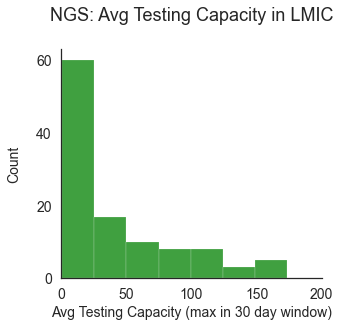

In [783]:
title = "NGS: Avg Testing Capacity in LMIC"

#formatting of the barchart
figsize = (24, 15)
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

sns.displot(stacked_df, x="max_new_tests_cap_avg", color = 'green')


plt.title(title, size = 18, y=1.1)
plt.xlabel("Avg Testing Capacity (max in 30 day window)", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 14) #size of the words
plt.yticks(size = 14)
plt.xlim((0, 200))

(0.0, 2.0)

<Figure size 432x288 with 0 Axes>

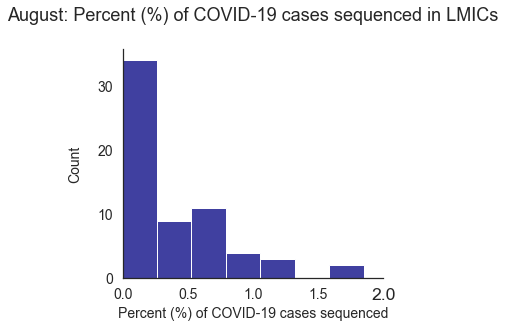

In [848]:
title = "August: Percent (%) of COVID-19 cases sequenced in LMICs"

#formatting of the barchart
figsize = (24, 15)
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

sns.displot(LMIC_Aug, x="percent_cases_sequenced", color = 'navy')


plt.title(title, size = 18, y=1.1)
plt.xlabel("Percent (%) of COVID-19 cases sequenced", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 14) #size of the words
plt.yticks(size = 14)
plt.xlim((0, 2))

(0.0, 2.0)

<Figure size 432x288 with 0 Axes>

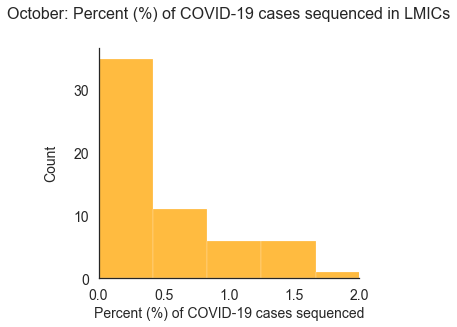

In [847]:
title = "October: Percent (%) of COVID-19 cases sequenced in LMICs"

#formatting of the barchart
figsize = (24, 15)
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

sns.displot(LMIC_Oct, x="percent_cases_sequenced", color = 'orange')


plt.title(title, size = 16, y=1.1)
plt.xlabel("Percent (%) of COVID-19 cases sequenced", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 14) #size of the words
plt.yticks(size = 14)
plt.xlim((0, 2))

(0.0, 10.0)

<Figure size 432x288 with 0 Axes>

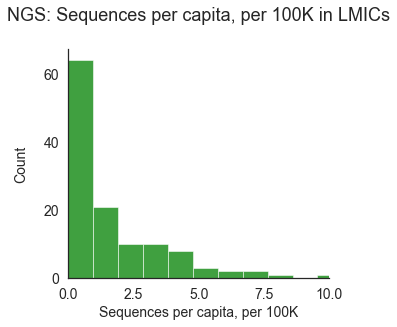

In [785]:
title = "NGS: Sequences per capita, per 100K in LMICs"

#formatting of the barchart
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

sns.displot(stacked_df, x="sequences_per_capita_per_100k", color = 'green')


plt.title(title, size = 18, y=1.1)
plt.xlabel("Sequences per capita, per 100K", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 14) #size of the words
plt.yticks(size = 14)
plt.xlim((0, 10))

# Comparison between categorical variables.


- comparing the categorical varialbes in the FIND map of August (downloaded from Flourish.com) and the recently generated October data (updated script produced)
- goal is to compare data, as the metrics are only a few month apart
- would like to know what anomolies do not exist



 - Note that the catagorical variables are:
     - 'who_testing_capacity',
     - 'owid_testing_capacity', 
     - "dx_testing_capacity", 
     - 'sars_cov_2_sequencing', 
     - 'world_bank_economies', 
     - 'archetype_full', 
     - 'archetype',
     - 'label', 
     - 'dx_testing_capacity_clean', 
     - 'sequencing_capacity_clean', 
     - 'sars_cov_2_sequencing_clean',
     - 'archetype_clean'


In [19]:
! pip3 install tabulate

# WHO Testing Capacity

In [786]:
#what are the number of values per categorical variable in Sept vs. Oct
print("WHO Testing Categories", LMIC_Aug[["who_testing_capacity"]].value_counts().to_markdown())
print("WHO Testing Categories", LMIC_Aug[["who_testing_capacity"]].value_counts(normalize=True))

#what are the number of values per categorical variable in Sept vs. Oct
print("WHO Testing Categories", LMIC_Oct[["who_testing_capacity"]].value_counts().to_markdown())
print("WHO Testing Categories", LMIC_Oct[["who_testing_capacity"]].value_counts(normalize=True))

WHO Testing Categories |                     |   0 |
|:--------------------|----:|
| ('1 - Reliable',)   |  49 |
| ('0 - Unreliable',) |  14 |
WHO Testing Categories who_testing_capacity
1 - Reliable            0.777778
0 - Unreliable          0.222222
dtype: float64
WHO Testing Categories |                     |   0 |
|:--------------------|----:|
| ('1 - Reliable',)   |  49 |
| ('0 - Unreliable',) |  14 |
WHO Testing Categories who_testing_capacity
1 - Reliable            0.777778
0 - Unreliable          0.222222
dtype: float64


(array([0, 1]), [Text(0, 0, '1 - Reliable'), Text(0, 1, '0 - Unreliable')])

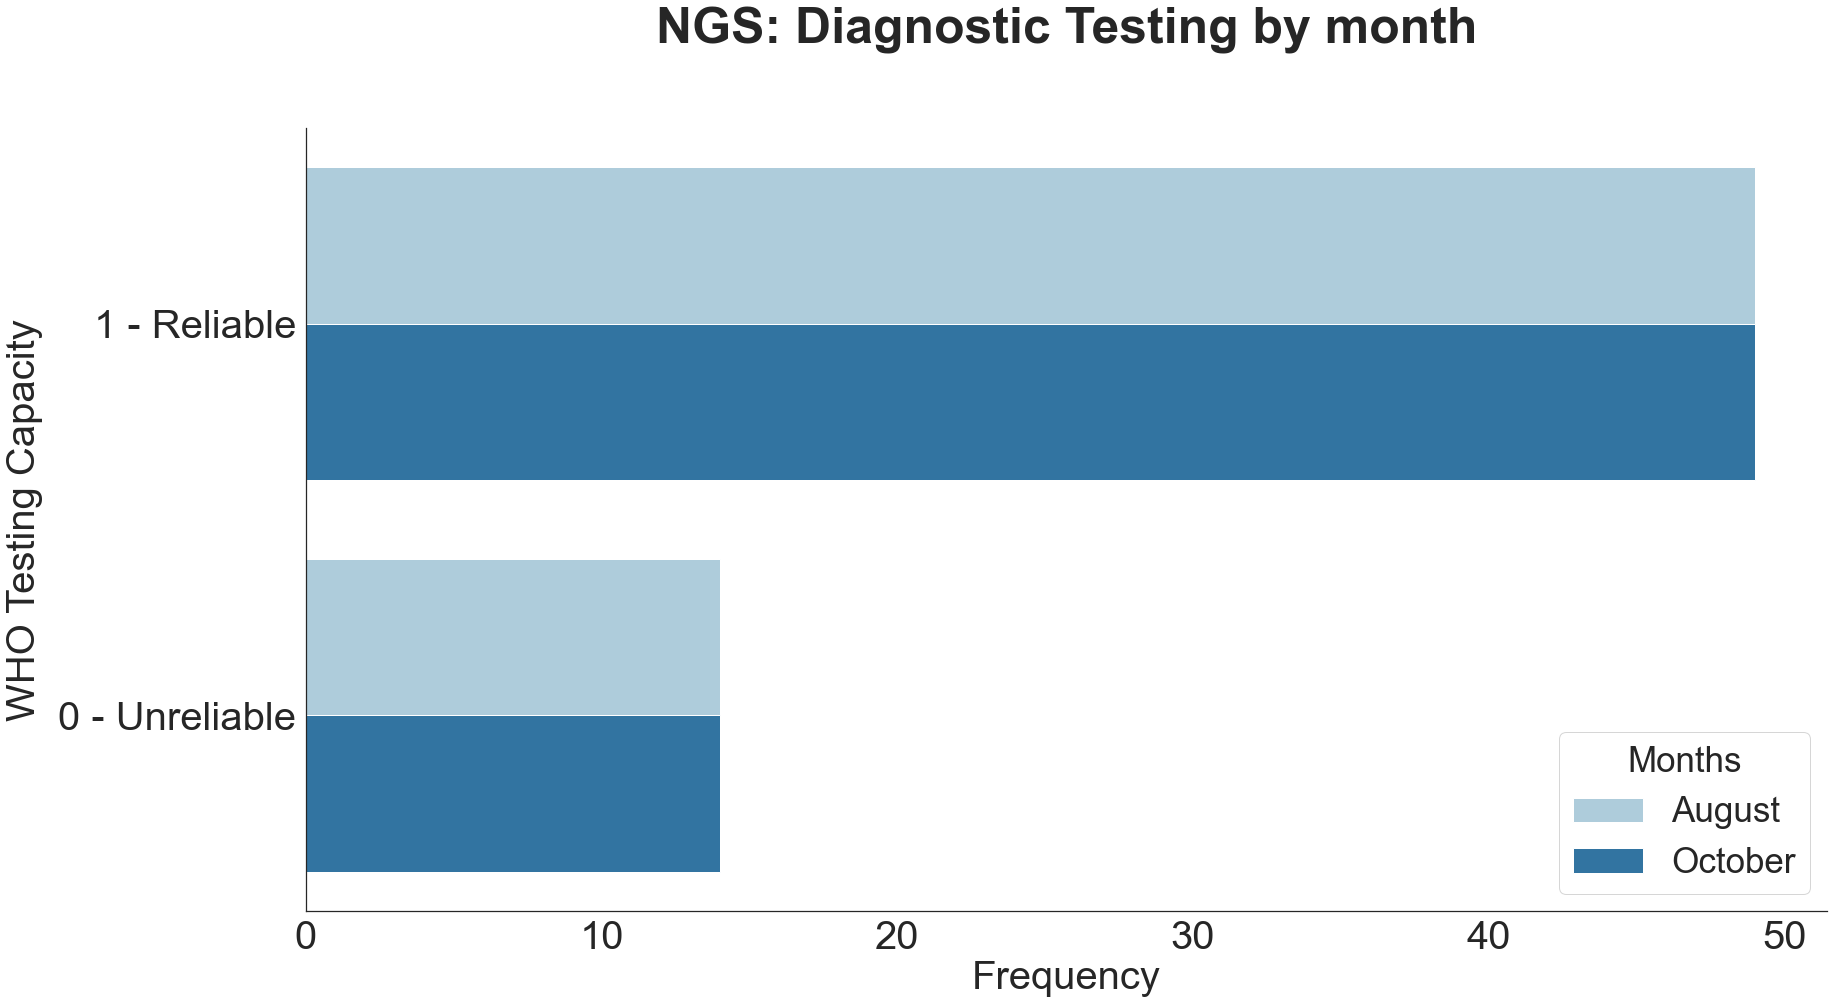

In [806]:
# Plot a bar chart category breakdowns
title = "NGS: Diagnostic Testing by month"

#formatting of the barchart
fig, ax = plt.subplots(1,figsize=(24, 14))
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

# count plot on two categorical variable
sns.countplot(y ='who_testing_capacity', hue = "month", 
              palette = "Paired", data = stacked_df)

#legend
plt.legend(labels=["August","October"], title = "Months", 
           fontsize = '35', title_fontsize = "35")


#extra formatting
plt.title(title, size = 50, weight='bold', y=1.1)
plt.xlabel("Frequency", size = 40)
plt.ylabel("WHO Testing Capacity",
           size = 40,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 40) #size of the words
plt.yticks(size = 40)
#plt.ylim((0, None))

# OWID testing

In [791]:
#what are the number of values per categorical variable in Sept vs. Oct
print("OWID Testing Categories", LMIC_Aug[["owid_testing_capacity_cat"]].value_counts().to_markdown())
print("OWID Testing Categories", LMIC_Aug[["owid_testing_capacity_cat"]].value_counts(normalize=True))

#what are the number of values per categorical variable in Sept vs. Oct
print("OWID Testing Categories", LMIC_Oct[["owid_testing_capacity_cat"]].value_counts().to_markdown())
print("OWID Testing Categories", LMIC_Oct[["owid_testing_capacity_cat"]].value_counts(normalize=True))

OWID Testing Categories |                   |   0 |
|:------------------|----:|
| ('1 - Reliable',) |  60 |
OWID Testing Categories owid_testing_capacity_cat
1 - Reliable                 1.0
dtype: float64
OWID Testing Categories |                     |   0 |
|:--------------------|----:|
| ('1 - Reliable',)   |  57 |
| ('0 - Unreliable',) |   3 |
OWID Testing Categories owid_testing_capacity_cat
1 - Reliable                 0.95
0 - Unreliable               0.05
dtype: float64


In [793]:
#Investigate weird Data
Where_OWID_UnReliable = LMIC_Oct.loc[(LMIC_Oct['owid_testing_capacity_cat'] == '0 - Unreliable')]
Where_OWID_UnReliable.head(4)

,country,code,region,who_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,ngs_capacity,...,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean,archetype_clean,month,owid_testing_capacity_cat
4,Afghanistan,AFG,Eastern Mediterranean,1 - Reliable,389.28,10.65,1970.843609,0.203075,Reliable testing capacity,NaN,...,Low income,2 - Connect,Connect,� Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,Connect,October,0 - Unreliable
50,Central African Republic,CAF,Africa,1 - Reliable,48.30,10.12,1402.877847,0.169394,Reliable testing capacity,NaN,...,Low income,2 - Connect,Connect,� Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,Connect,October,0 - Unreliable
155,Mozambique,MOZ,Africa,1 - Reliable,312.55,15.68,2969.931211,0.162818,Reliable testing capacity,NaN,...,Low income,3 - Leverage,Leverage,� Leverage existing NGS capacity,Reliable testing capacity,0 NGS facilities or equivalent,500+ sequences,Leverage,October,0 - Unreliable


(array([0, 1]), [Text(0, 0, '1 - Reliable'), Text(0, 1, '0 - Unreliable')])

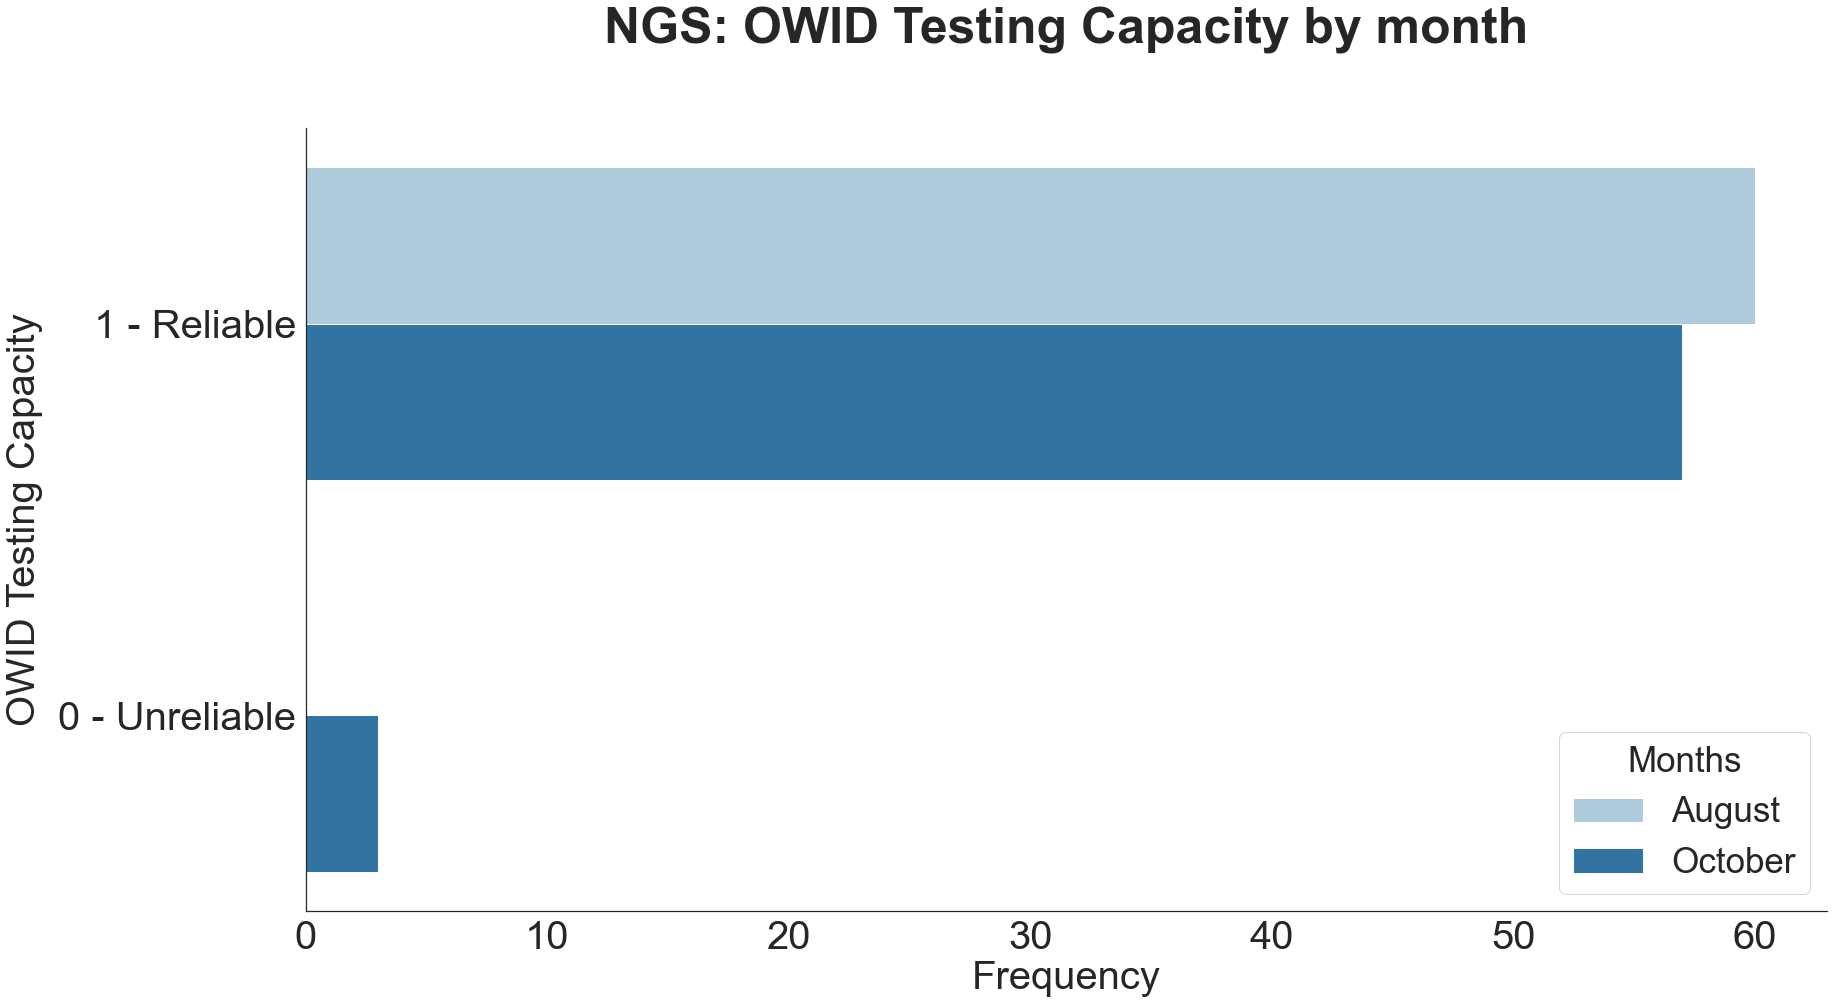

In [805]:
# Plot a bar chart category breakdowns
title = "NGS: OWID Testing Capacity by month"

#formatting of the barchart
fig, ax = plt.subplots(1,figsize=(24, 14))
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

# count plot on two categorical variable
sns.countplot(y ='owid_testing_capacity_cat', hue = "month", 
              palette = "Paired", data = stacked_df)

#legend
plt.legend(labels=["August","October"], title = "Months", 
           fontsize = '35', title_fontsize = "35")


#extra formatting
plt.title(title, size = 50, weight='bold', y=1.1)
plt.xlabel("Frequency", size = 40)
plt.ylabel("OWID Testing Capacity",
           size = 40,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 40) #size of the words
plt.yticks(size = 40)
#plt.ylim((0, None))

# Dx Testing Capacity

In [794]:
#what are the number of values per categorical variable in Sept vs. Oct
print("Dx Testing Categories", LMIC_Aug[["dx_testing_capacity"]].value_counts().to_markdown())
print("Dx Testing Categories", LMIC_Aug[["dx_testing_capacity"]].value_counts(normalize=True))

print("Dx Testing Categories", LMIC_Oct[["dx_testing_capacity"]].value_counts().to_markdown())
print("Dx Testing Categories", LMIC_Oct[["dx_testing_capacity"]].value_counts(normalize=True))

Dx Testing Categories |                                  |   0 |
|:---------------------------------|----:|
| ('Reliable testing capacity',)   |  52 |
| ('Unreliable testing capacity',) |  11 |
Dx Testing Categories dx_testing_capacity        
Reliable testing capacity      0.825397
Unreliable testing capacity    0.174603
dtype: float64
Dx Testing Categories |                                  |   0 |
|:---------------------------------|----:|
| ('Reliable testing capacity',)   |  52 |
| ('Unreliable testing capacity',) |  11 |
Dx Testing Categories dx_testing_capacity        
Reliable testing capacity      0.825397
Unreliable testing capacity    0.174603
dtype: float64


(array([0, 1]),
 [Text(0, 0, 'Reliable testing capacity'),
  Text(0, 1, 'Unreliable testing capacity')])

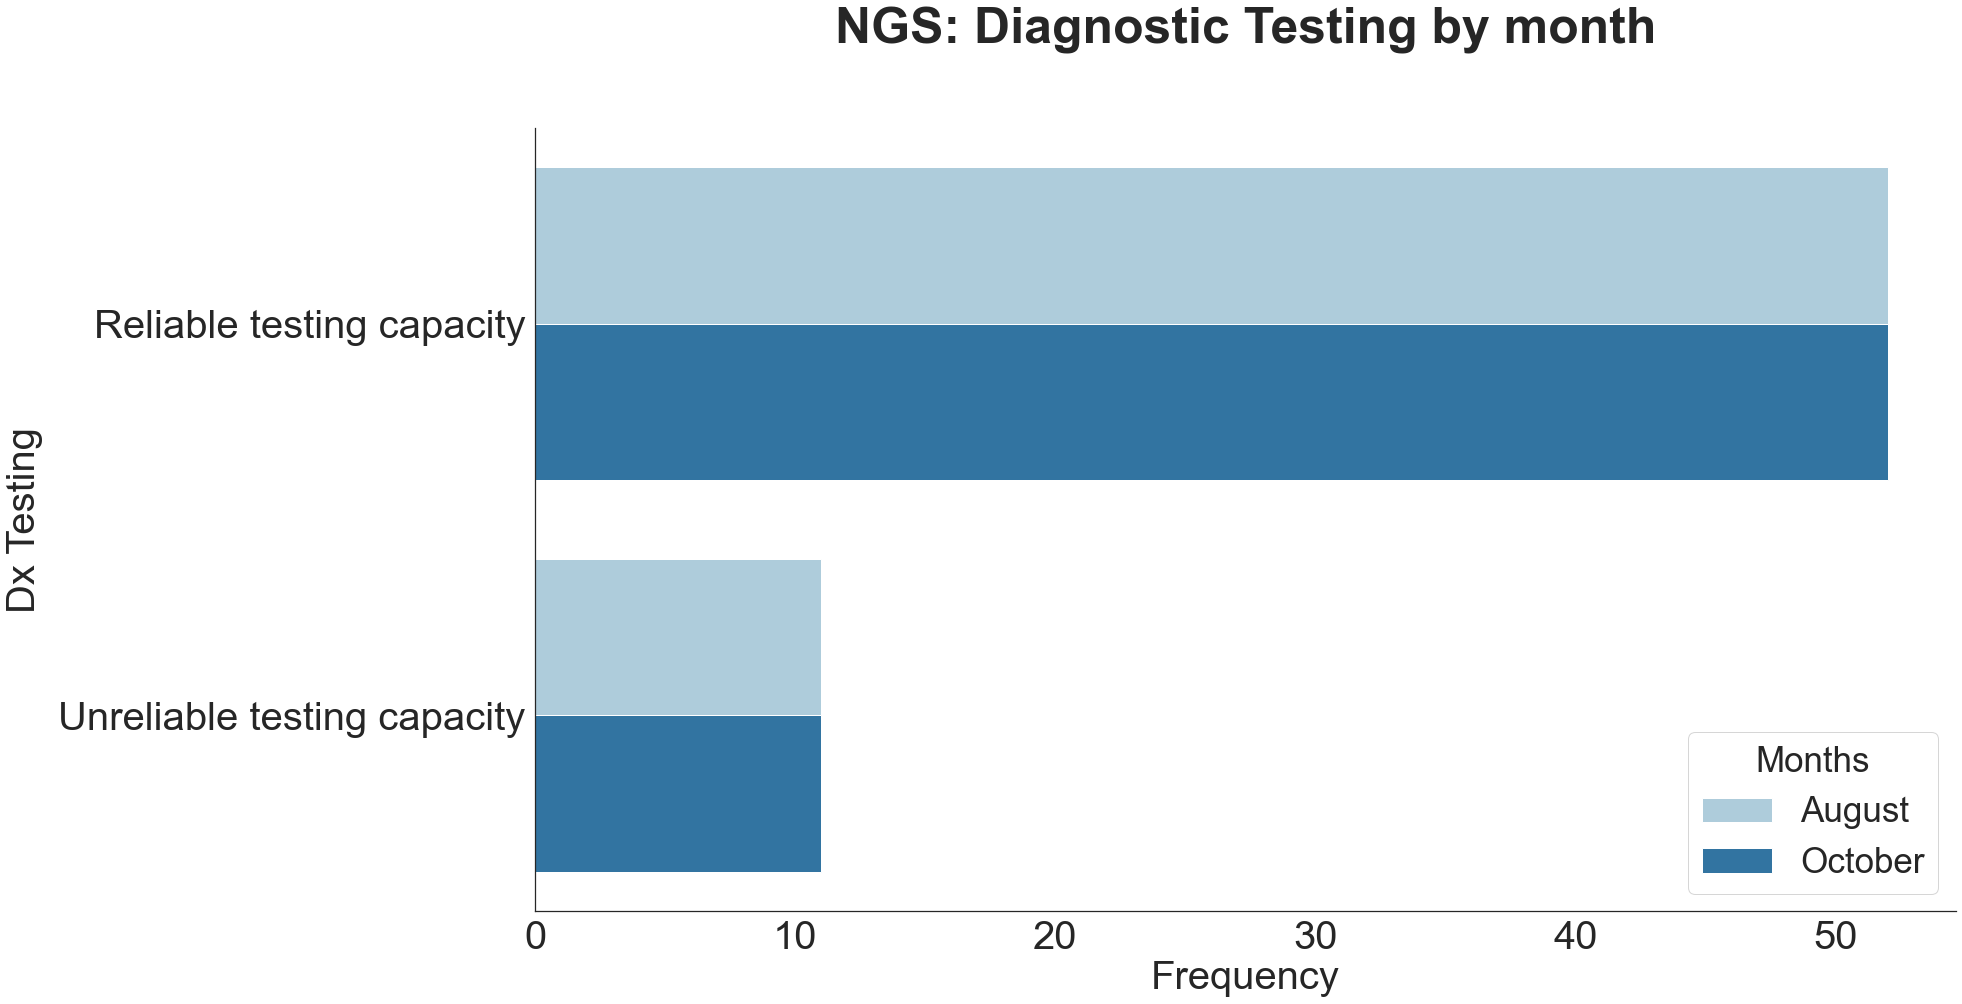

In [804]:
# Plot a bar chart category breakdowns
title = "NGS: Diagnostic Testing by month"

#formatting of the barchart
fig, ax = plt.subplots(1,figsize=(24, 14))
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

# count plot on two categorical variable
sns.countplot(y ='dx_testing_capacity', hue = "month", palette = "Paired", data = stacked_df)

#legend
plt.legend(labels=["August","October"], title = "Months", 
           fontsize = '35', title_fontsize = "35")


#extra formatting
plt.title(title, size = 50, weight='bold', y=1.1)
plt.xlabel("Frequency", size = 40)
plt.ylabel("Dx Testing",
           size = 40,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 40) #size of the words
plt.yticks(size = 40)
#plt.ylim((0, None))

# SARS-CoV-2 Sequencing

In [797]:
print("SARS-CoV-2 Sequencing Categories", LMIC_Aug[["sars_cov_2_sequencing"]].value_counts().to_markdown())
print("SARS-CoV-2 Sequencing Categories", LMIC_Aug[["sars_cov_2_sequencing"]].value_counts(normalize=True))

SARS-CoV-2 Sequencing Categories |                      |   0 |
|:---------------------|----:|
| ('1-499 sequences',) |  38 |
| ('500+ sequences',)  |  17 |
| ('0 sequences',)     |   8 |
SARS-CoV-2 Sequencing Categories sars_cov_2_sequencing
1-499 sequences          0.603175
500+ sequences           0.269841
0 sequences              0.126984
dtype: float64


In [796]:
print("SARS-CoV-2 Sequencing Categories", LMIC_Oct[["sars_cov_2_sequencing"]].value_counts().to_markdown())
print("SARS-CoV-2 Sequencing Categories", LMIC_Oct[["sars_cov_2_sequencing"]].value_counts(normalize=True))

SARS-CoV-2 Sequencing Categories |                      |   0 |
|:---------------------|----:|
| ('1-499 sequences',) |  37 |
| ('500+ sequences',)  |  24 |
| ('0 sequences',)     |   2 |
SARS-CoV-2 Sequencing Categories sars_cov_2_sequencing
1-499 sequences          0.587302
500+ sequences           0.380952
0 sequences              0.031746
dtype: float64


In [801]:
stacked_df.sort_values(by='sars_cov_2_sequencing', ascending=True, inplace=True)
stacked_df.tail(2)

,country,code,region,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,ngs_capacity,sequencing_capacity,...,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean,month,who_testing_capacity,owid_testing_capacity_cat,archetype_clean
66,Bangladesh,BGD,South-East Asia,1646.89,25.41,5784.934027,0.164403,Reliable testing capacity,2.0,2 - 4+ NGS facilities or equivalent,...,4 - Strengthen,Strengthen,� Build additional NGS capacity for scale-up,Reliable testing capacity,4+ NGS facilities or equivalent,500+ sequences,October,1 - Reliable,1 - Reliable,Strengthen
125,Zimbabwe,ZWE,Africa,148.63,77.95,9878.093252,0.090183,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,...,3 - Leverage,Leverage,� Leverage existing NGS capacity,Reliable testing capacity,0 NGS facilities or equivalent,500+ sequences,October,1 - Reliable,1 - Reliable,Leverage


(array([0, 1, 2]),
 [Text(0, 0, '0 sequences'),
  Text(0, 1, '1-499 sequences'),
  Text(0, 2, '500+ sequences')])

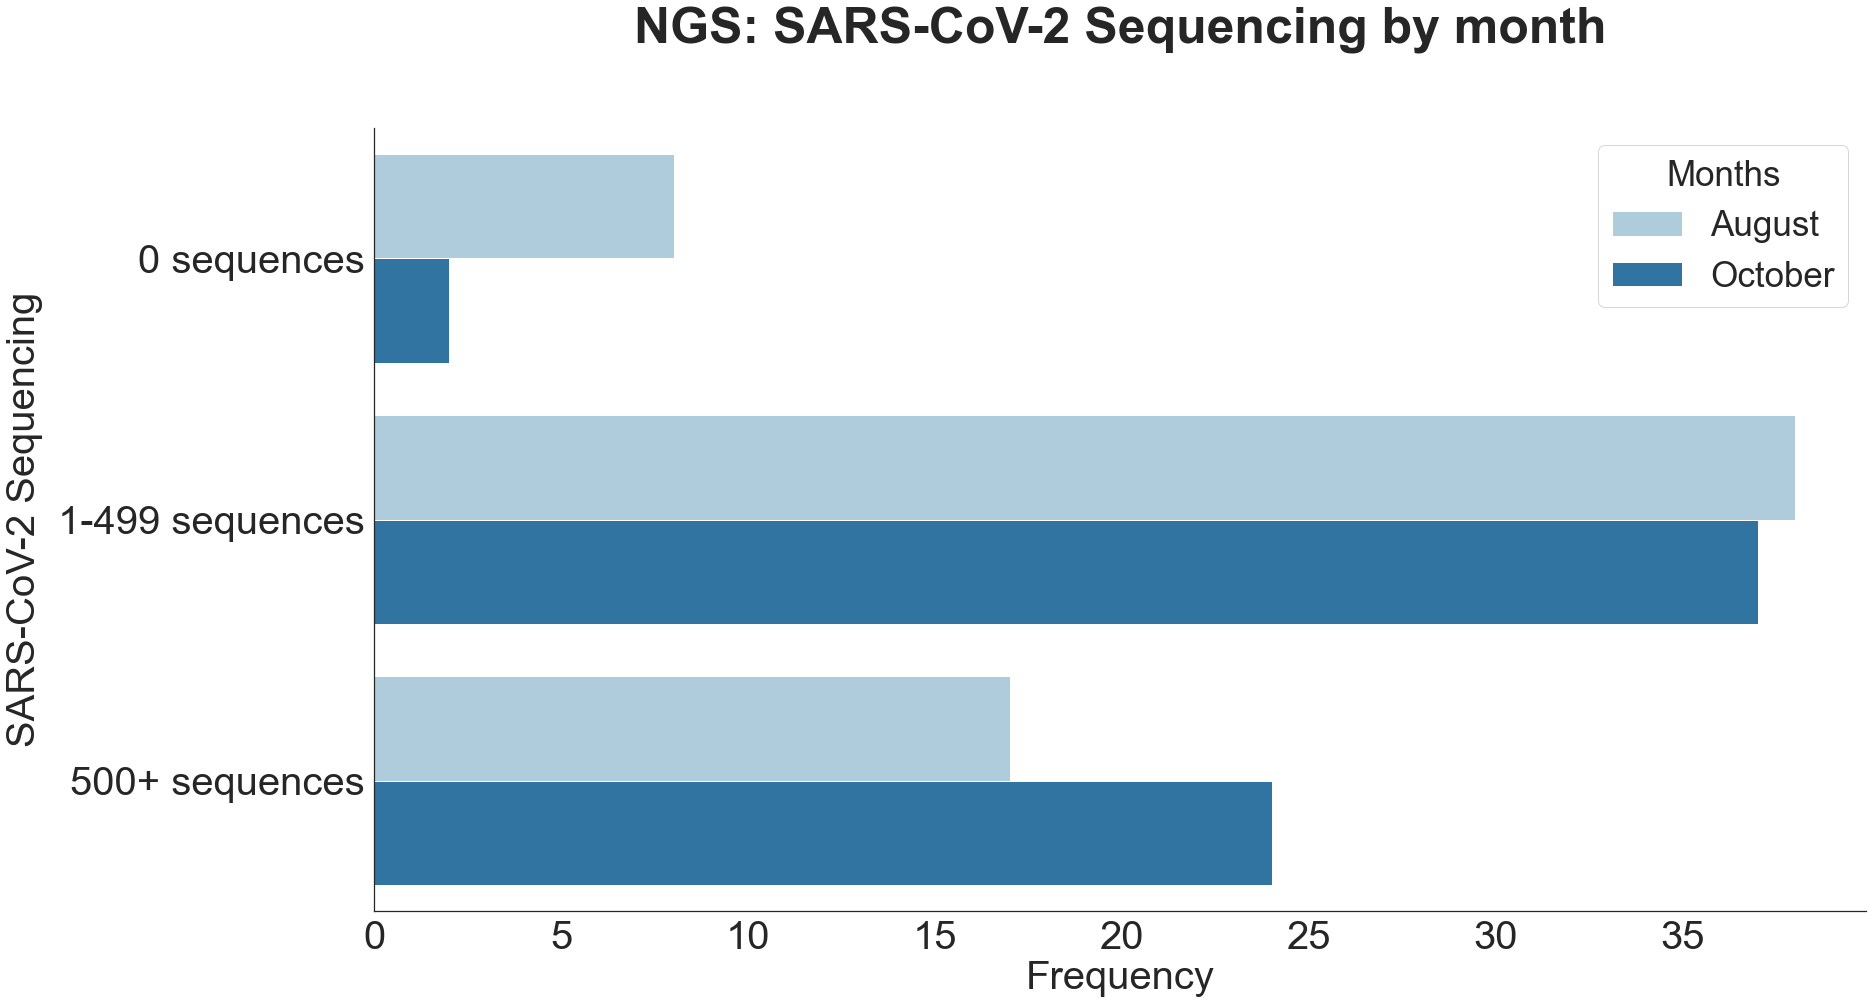

In [803]:

# Plot a bar chart category breakdowns
title = "NGS: SARS-CoV-2 Sequencing by month"

#formatting of the barchart
fig, ax = plt.subplots(1,figsize=(24, 14))
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

# count plot on two categorical variable
sns.countplot(y ='sars_cov_2_sequencing', hue = "month", 
              palette = "Paired", data = stacked_df)

#legend
plt.legend(labels=["August","October"], title = "Months", 
           fontsize = '35', title_fontsize = "35")


#extra formatting
plt.title(title, size = 50, weight='bold', y=1.1)
plt.xlabel("Frequency", size = 40)
plt.ylabel("SARS-CoV-2 Sequencing",
           size = 40,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 40) #size of the words
plt.yticks(size = 40)
#plt.ylim((0, None))

# World Bank Economies

In [808]:
print("World Bank Economies Categories", LMIC_Aug[["world_bank_economies"]].value_counts().to_markdown())
print("World Bank Economies Categories", LMIC_Aug[["world_bank_economies"]].value_counts(normalize=True))

World Bank Economies Categories |                          |   0 |
|:-------------------------|----:|
| ('Lower middle income',) |  38 |
| ('Low income',)          |  21 |
| ('Upper middle income',) |   4 |
World Bank Economies Categories world_bank_economies
Lower middle income     0.603175
Low income              0.333333
Upper middle income     0.063492
dtype: float64


In [807]:
print("World Bank Economies Categories", LMIC_Oct[["world_bank_economies"]].value_counts().to_markdown())
print("World Bank Economies Categories", LMIC_Oct[["world_bank_economies"]].value_counts(normalize=True))

World Bank Economies Categories |                          |   0 |
|:-------------------------|----:|
| ('Lower middle income',) |  38 |
| ('Low income',)          |  21 |
| ('Upper middle income',) |   4 |
World Bank Economies Categories world_bank_economies
Lower middle income     0.603175
Low income              0.333333
Upper middle income     0.063492
dtype: float64


In [810]:
stacked_df.sort_values(by='world_bank_economies', ascending=True, inplace=True)
stacked_df.tail(2)

,country,code,region,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,ngs_capacity,sequencing_capacity,...,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean,month,who_testing_capacity,owid_testing_capacity_cat,archetype_clean
46,Samoa,WSM,Western Pacific,1.98,NaN,0.000000,NaN,Unreliable testing capacity,NaN,0 NGS facilities or equivalent,...,1 - Test,Test,– Increase diagnostic testing capacity,Unreliable testing capacity,0 NGS facilities or equivalent,0 sequences,August,0 - Unreliable,None,NaN
25,Indonesia,IDN,South-East Asia,2735.24,98.2,10589.969436,0.130296,Reliable testing capacity,2.0,4+ NGS facilities or equivalent,...,4 - Strengthen,Strengthen,– Build additional NGS capacity for scale-up,Reliable testing capacity,4+ NGS facilities or equivalent,500+ sequences,August,1 - Reliable,1 - Reliable,NaN


(array([0, 1, 2]),
 [Text(0, 0, 'Low income'),
  Text(0, 1, 'Lower middle income'),
  Text(0, 2, 'Upper middle income')])

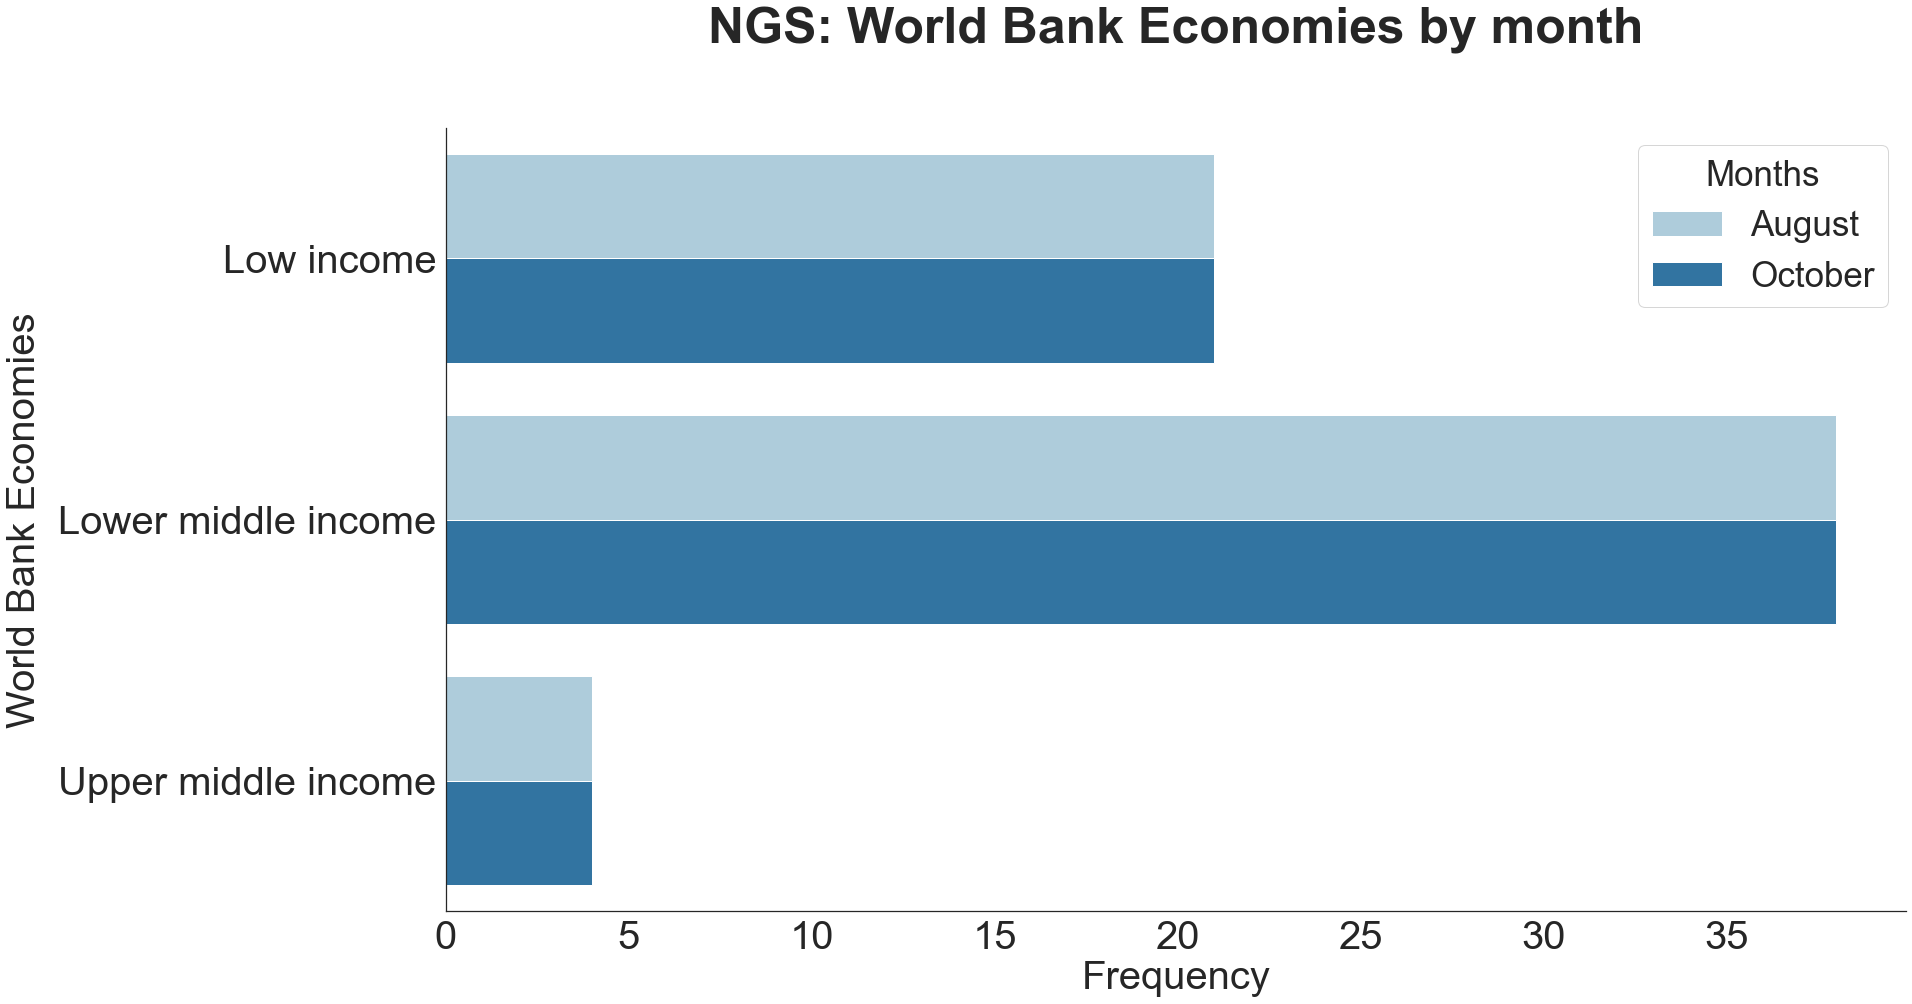

In [822]:
# Plot a bar chart category breakdowns
title = "NGS: World Bank Economies by month"

#formatting of the barchart
fig, ax = plt.subplots(1,figsize=(24, 14))
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

# count plot on two categorical variable
sns.countplot(y ='world_bank_economies', hue = "month", 
              palette = "Paired", data = stacked_df)

#legend
plt.legend(labels=["August","October"], title = "Months", 
           fontsize = '35', title_fontsize = "35")


#extra formatting
plt.title(title, size = 50, weight='bold', y=1.1)
plt.xlabel("Frequency", size = 40)
plt.ylabel("World Bank Economies",
           size = 40,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 40) #size of the words
plt.yticks(size = 40)
#plt.ylim((0, None))

# Archetype "Full"

In [813]:
print("Archetype Full Categories", LMIC_Aug[["archetype_full"]].value_counts().to_markdown())
print("Archetype Full Categories", LMIC_Aug[["archetype_full"]].value_counts(normalize=True))

Archetype Full Categories |                     |   0 |
|:--------------------|----:|
| ('2 - Connect',)    |  24 |
| ('4 - Strengthen',) |  15 |
| ('3 - Leverage',)   |  13 |
| ('1 - Test',)       |  11 |
Archetype Full Categories archetype_full
2 - Connect       0.380952
4 - Strengthen    0.238095
3 - Leverage      0.206349
1 - Test          0.174603
dtype: float64


In [812]:
print("Archetype Full Categories", LMIC_Oct[["archetype_full"]].value_counts().to_markdown())
print("Archetype Full Categories", LMIC_Oct[["archetype_full"]].value_counts(normalize=True))

Archetype Full Categories |                     |   0 |
|:--------------------|----:|
| ('2 - Connect',)    |  21 |
| ('4 - Strengthen',) |  18 |
| ('3 - Leverage',)   |  13 |
| ('1 - Test',)       |  11 |
Archetype Full Categories archetype_full
2 - Connect       0.333333
4 - Strengthen    0.285714
3 - Leverage      0.206349
1 - Test          0.174603
dtype: float64


In [815]:
stacked_df.sort_values(by='archetype_full', ascending=True, inplace=True)
stacked_df.tail(2)

,country,code,region,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,ngs_capacity,sequencing_capacity,...,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean,month,who_testing_capacity,owid_testing_capacity_cat,archetype_clean
106,Philippines,PHL,Western Pacific,1095.81,72.12,20278.496272,0.122933,Reliable testing capacity,1.0,1 - 1-3 NGS facilities or equivalent,...,4 - Strengthen,Strengthen,� Build additional NGS capacity for scale-up,Reliable testing capacity,1-3 NGS facilities or equivalent,500+ sequences,October,1 - Reliable,1 - Reliable,Strengthen
25,Indonesia,IDN,South-East Asia,2735.24,98.20,10589.969436,0.130296,Reliable testing capacity,2.0,4+ NGS facilities or equivalent,...,4 - Strengthen,Strengthen,– Build additional NGS capacity for scale-up,Reliable testing capacity,4+ NGS facilities or equivalent,500+ sequences,August,1 - Reliable,1 - Reliable,NaN


(array([0, 1, 2, 3]),
 [Text(0, 0, '1 - Test'),
  Text(0, 1, '2 - Connect'),
  Text(0, 2, '3 - Leverage'),
  Text(0, 3, '4 - Strengthen')])

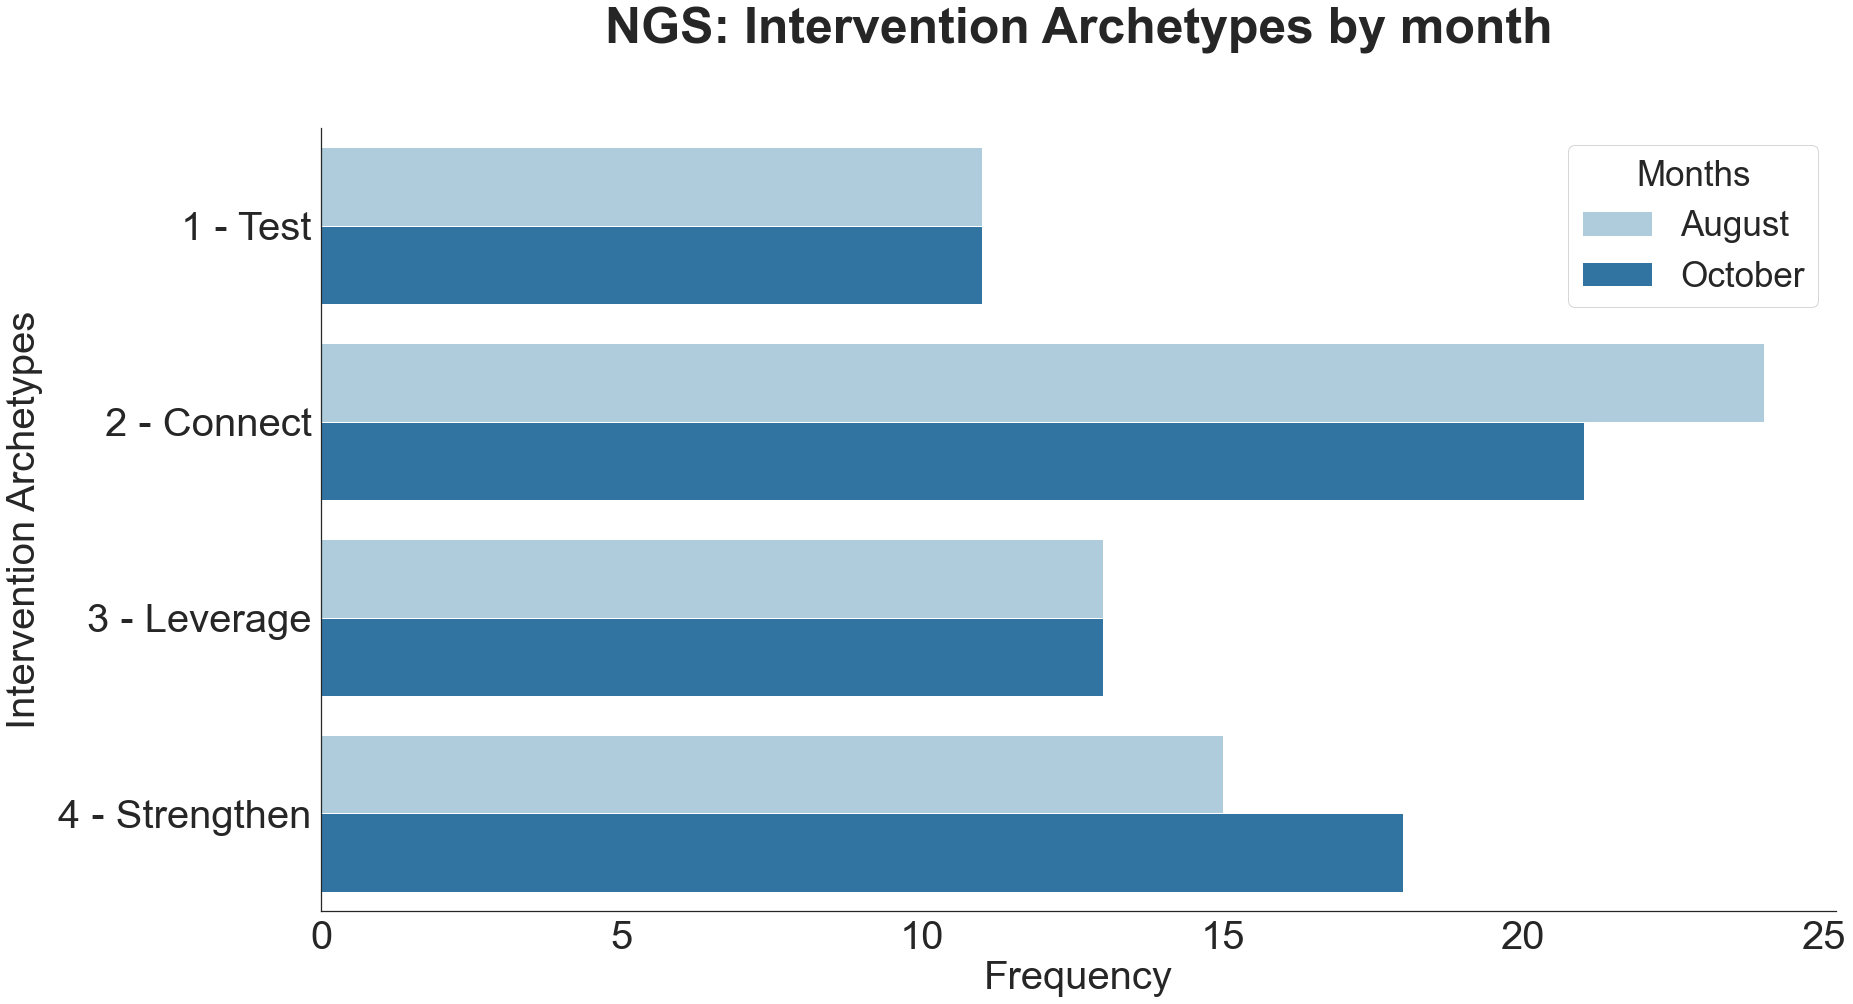

In [821]:
# Plot a bar chart category breakdowns
title = "NGS: Intervention Archetypes by month"

#formatting of the barchart
fig, ax = plt.subplots(1,figsize=(24, 14))
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

# count plot on two categorical variable
sns.countplot(y ='archetype_full', hue = "month", 
              palette = "Paired", data = stacked_df)

#legend
plt.legend(labels=["August","October"], title = "Months", 
           fontsize = '35', title_fontsize = "35")


#extra formatting
plt.title(title, size = 50, weight='bold', y=1.1)
plt.xlabel("Frequency", size = 40)
plt.ylabel("Intervention Archetypes",
           size = 40,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 40) #size of the words
plt.yticks(size = 40)
#plt.ylim((0, None))

# Archetype 

In [968]:
print("Archetype Categories", LMIC_Aug[["archetype"]].value_counts().to_markdown())
print("Archetype Categories", LMIC_Aug[["archetype"]].value_counts(normalize=True))

Archetype Categories |                 |   0 |
|:----------------|----:|
| ('Connect',)    |  24 |
| ('Strengthen',) |  15 |
| ('Leverage',)   |  13 |
| ('Test',)       |  11 |
Archetype Categories archetype 
Connect       0.380952
Strengthen    0.238095
Leverage      0.206349
Test          0.174603
dtype: float64


In [967]:
print("Archetype Categories", LMIC_Oct[["archetype"]].value_counts().to_markdown())
print("Archetype Categories", LMIC_Oct[["archetype"]].value_counts(normalize=True))

Archetype Categories |                 |   0 |
|:----------------|----:|
| ('Connect',)    |  21 |
| ('Strengthen',) |  18 |
| ('Leverage',)   |  13 |
| ('Test',)       |  11 |
Archetype Categories archetype 
Connect       0.333333
Strengthen    0.285714
Leverage      0.206349
Test          0.174603
dtype: float64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Test'),
  Text(0, 1, 'Connect'),
  Text(0, 2, 'Leverage'),
  Text(0, 3, 'Strengthen')])

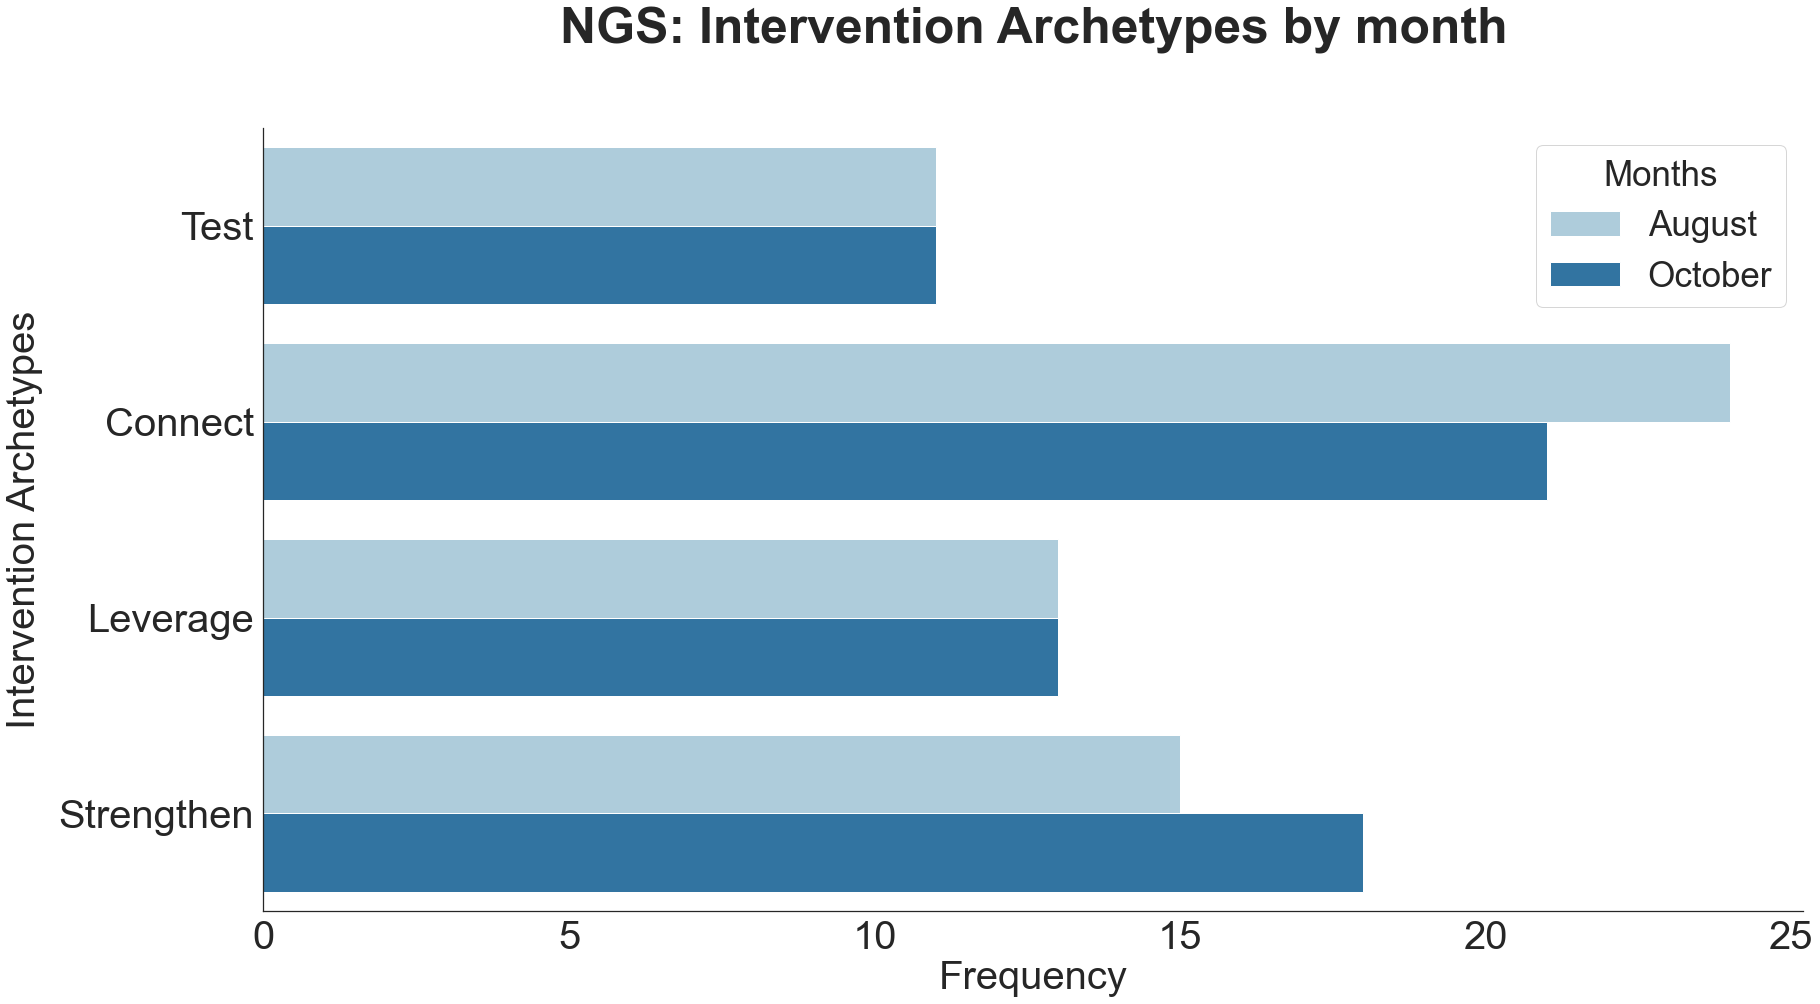

In [820]:
# Plot a bar chart category breakdowns
title = "NGS: Intervention Archetypes by month"

#formatting of the barchart
fig, ax = plt.subplots(1,figsize=(24, 14))
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

# count plot on two categorical variable
sns.countplot(y ='archetype', hue = "month", 
              palette = "Paired", data = stacked_df)

#legend
plt.legend(labels=["August","October"], title = "Months", 
           fontsize = '35', title_fontsize = "35")


#extra formatting
plt.title(title, size = 50, weight='bold', y=1.1)
plt.xlabel("Frequency", size = 40)
plt.ylabel("Intervention Archetypes",
           size = 40,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 40) #size of the words
plt.yticks(size = 40)
#plt.ylim((0, None))

# Intervention Strategies

In [824]:
print("Label Categories", LMIC_Aug[["label"]].value_counts().to_markdown())
print("Label Categories", LMIC_Aug[["label"]].value_counts(normalize=True))

Label Categories |                                                                           |   0 |
|:--------------------------------------------------------------------------|----:|
| ('– Set-up sample referral networks or build NGS capacity from scratch',) |  24 |
| ('– Build additional NGS capacity for scale-up',)                         |  15 |
| ('– Leverage existing NGS capacity',)                                     |  13 |
| ('– Increase diagnostic testing capacity',)                               |  11 |
Label Categories label                                                               
– Set-up sample referral networks or build NGS capacity from scratch    0.380952
– Build additional NGS capacity for scale-up                            0.238095
– Leverage existing NGS capacity                                        0.206349
– Increase diagnostic testing capacity                                  0.174603
dtype: float64


In [960]:
print("Label Categories", LMIC_Oct[["label"]].value_counts().to_markdown())
print("Label Categories", LMIC_Oct[["label"]].value_counts(normalize=True))

Label Categories |                                                                           |   0 |
|:--------------------------------------------------------------------------|----:|
| ('– Set-up sample referral networks or build NGS capacity from scratch',) |  21 |
| ('– Build additional NGS capacity for scale-up',)                         |  18 |
| ('– Leverage existing NGS capacity',)                                     |  13 |
| ('– Increase diagnostic testing capacity',)                               |  11 |
Label Categories label                                                               
– Set-up sample referral networks or build NGS capacity from scratch    0.333333
– Build additional NGS capacity for scale-up                            0.285714
– Leverage existing NGS capacity                                        0.206349
– Increase diagnostic testing capacity                                  0.174603
dtype: float64


(array([0, 1, 2, 3]),
 [Text(0, 0, '– Set-up sample referral networks or build NGS capacity from scratch'),
  Text(0, 1, '– Leverage existing NGS capacity'),
  Text(0, 2, '– Build additional NGS capacity for scale-up'),
  Text(0, 3, '– Increase diagnostic testing capacity')])

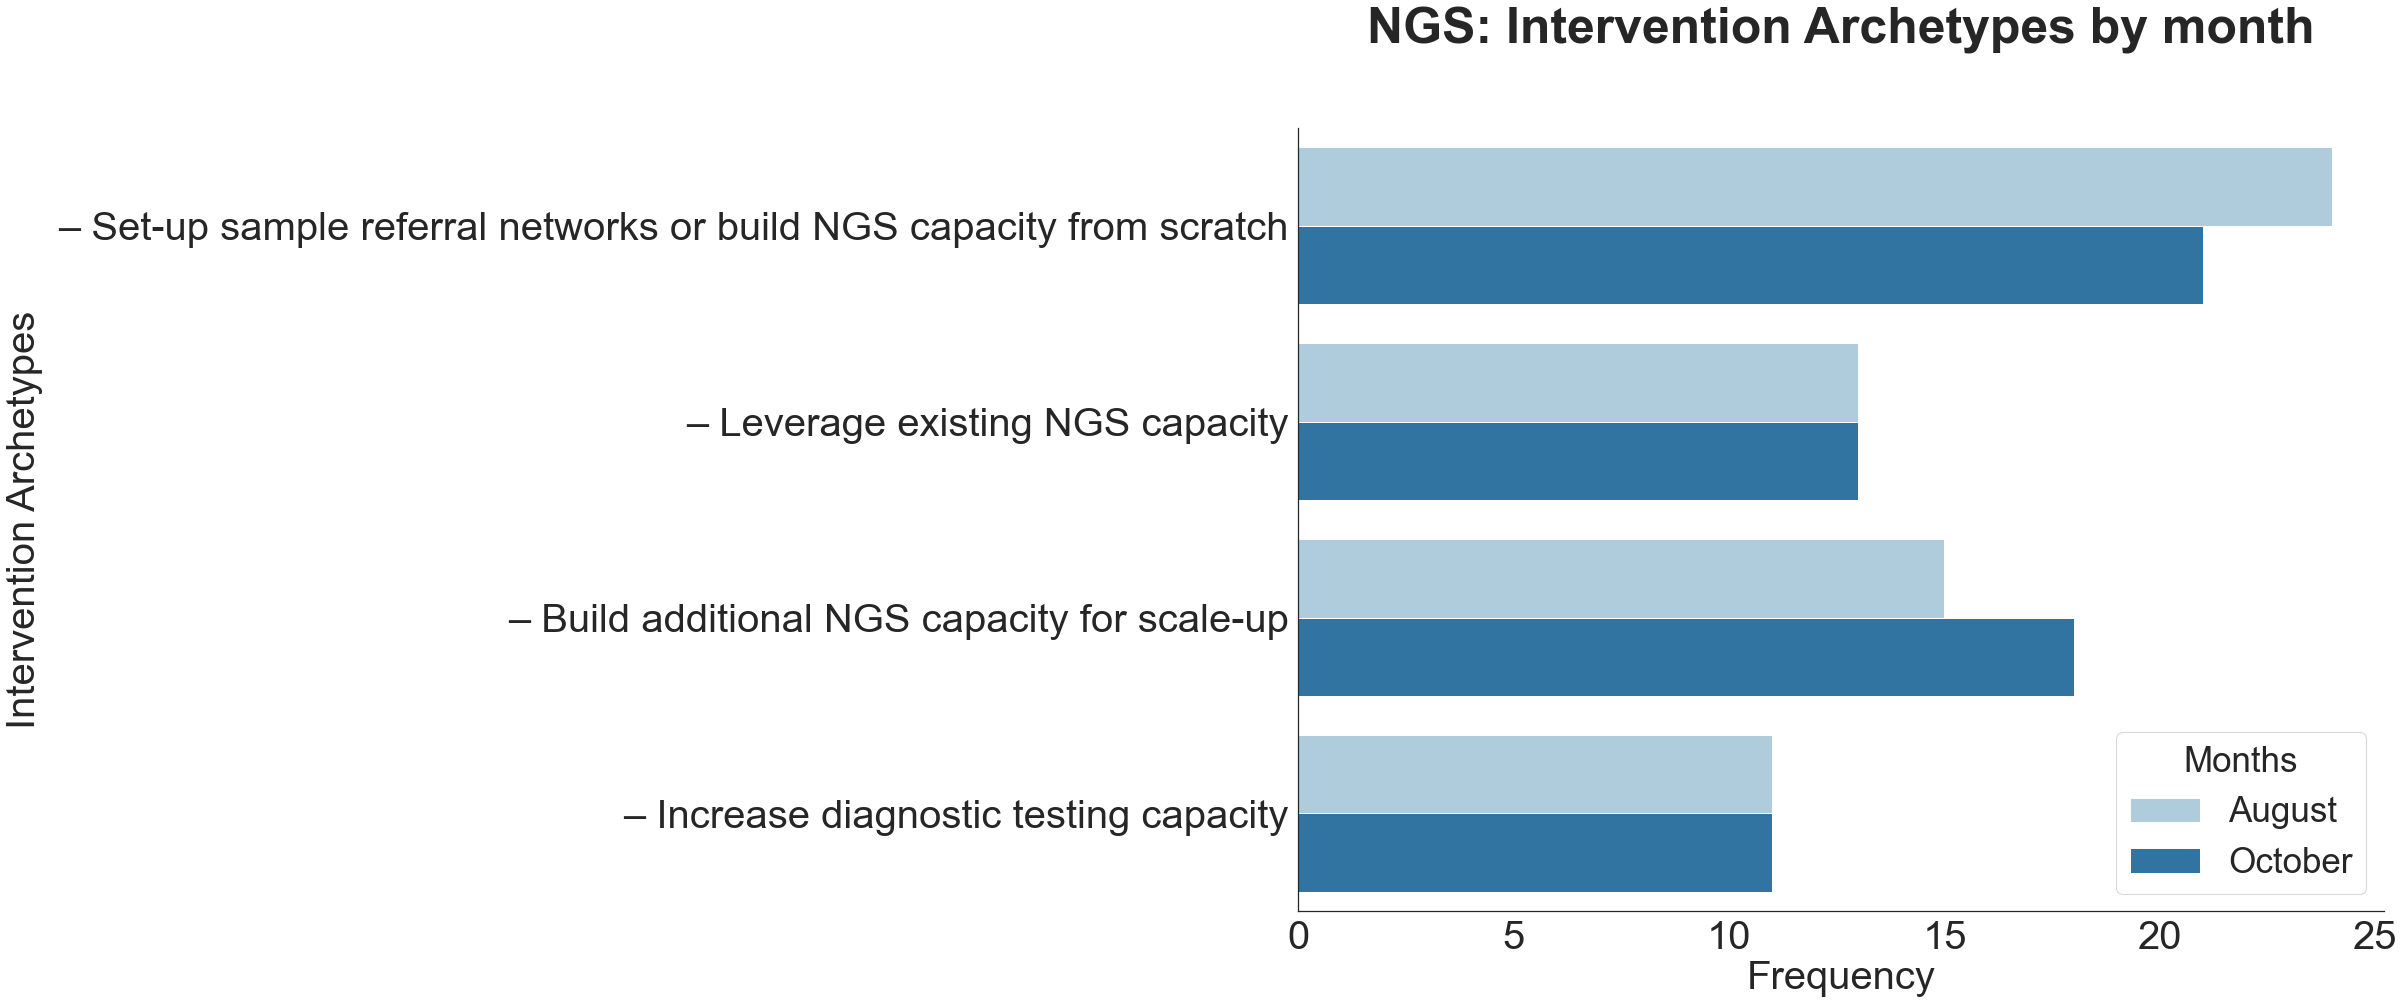

In [959]:
# Plot a bar chart category breakdowns
title = "NGS: Intervention Archetypes by month"

#formatting of the barchart
fig, ax = plt.subplots(1,figsize=(24, 14))
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

# count plot on two categorical variable
sns.countplot(y ='label', hue = "month", 
              palette = "Paired", data = stacked_df)

#legend
plt.legend(labels=["August","October"], title = "Months", 
           fontsize = '35', title_fontsize = "35")


#extra formatting
plt.title(title, size = 50, weight='bold', y=1.1)
plt.xlabel("Frequency", size = 40)
plt.ylabel("Intervention Archetypes",
           size = 40,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 40) #size of the words
plt.yticks(size = 40)
#plt.ylim((0, None))

# Dx Testing Capacity "Clean"

In [826]:
print("Dx Testing Cap Clean Categories", LMIC_Aug[["dx_testing_capacity_clean"]].value_counts().to_markdown())
print("Dx Testing Cap Clean Categories", LMIC_Aug[["dx_testing_capacity_clean"]].value_counts(normalize=True))

Dx Testing Cap Clean Categories |                                  |   0 |
|:---------------------------------|----:|
| ('Reliable testing capacity',)   |  52 |
| ('Unreliable testing capacity',) |  11 |
Dx Testing Cap Clean Categories dx_testing_capacity_clean  
Reliable testing capacity      0.825397
Unreliable testing capacity    0.174603
dtype: float64


In [827]:
print("Dx Testing Cap Clean Categories", LMIC_Oct[["dx_testing_capacity_clean"]].value_counts().to_markdown())
print("Dx Testing Cap Clean Categories", LMIC_Oct[["dx_testing_capacity_clean"]].value_counts(normalize=True))

Dx Testing Cap Clean Categories |                                  |   0 |
|:---------------------------------|----:|
| ('Reliable testing capacity',)   |  52 |
| ('Unreliable testing capacity',) |  11 |
Dx Testing Cap Clean Categories dx_testing_capacity_clean  
Reliable testing capacity      0.825397
Unreliable testing capacity    0.174603
dtype: float64


(array([0, 1]),
 [Text(0, 0, 'Unreliable testing capacity'),
  Text(0, 1, 'Reliable testing capacity')])

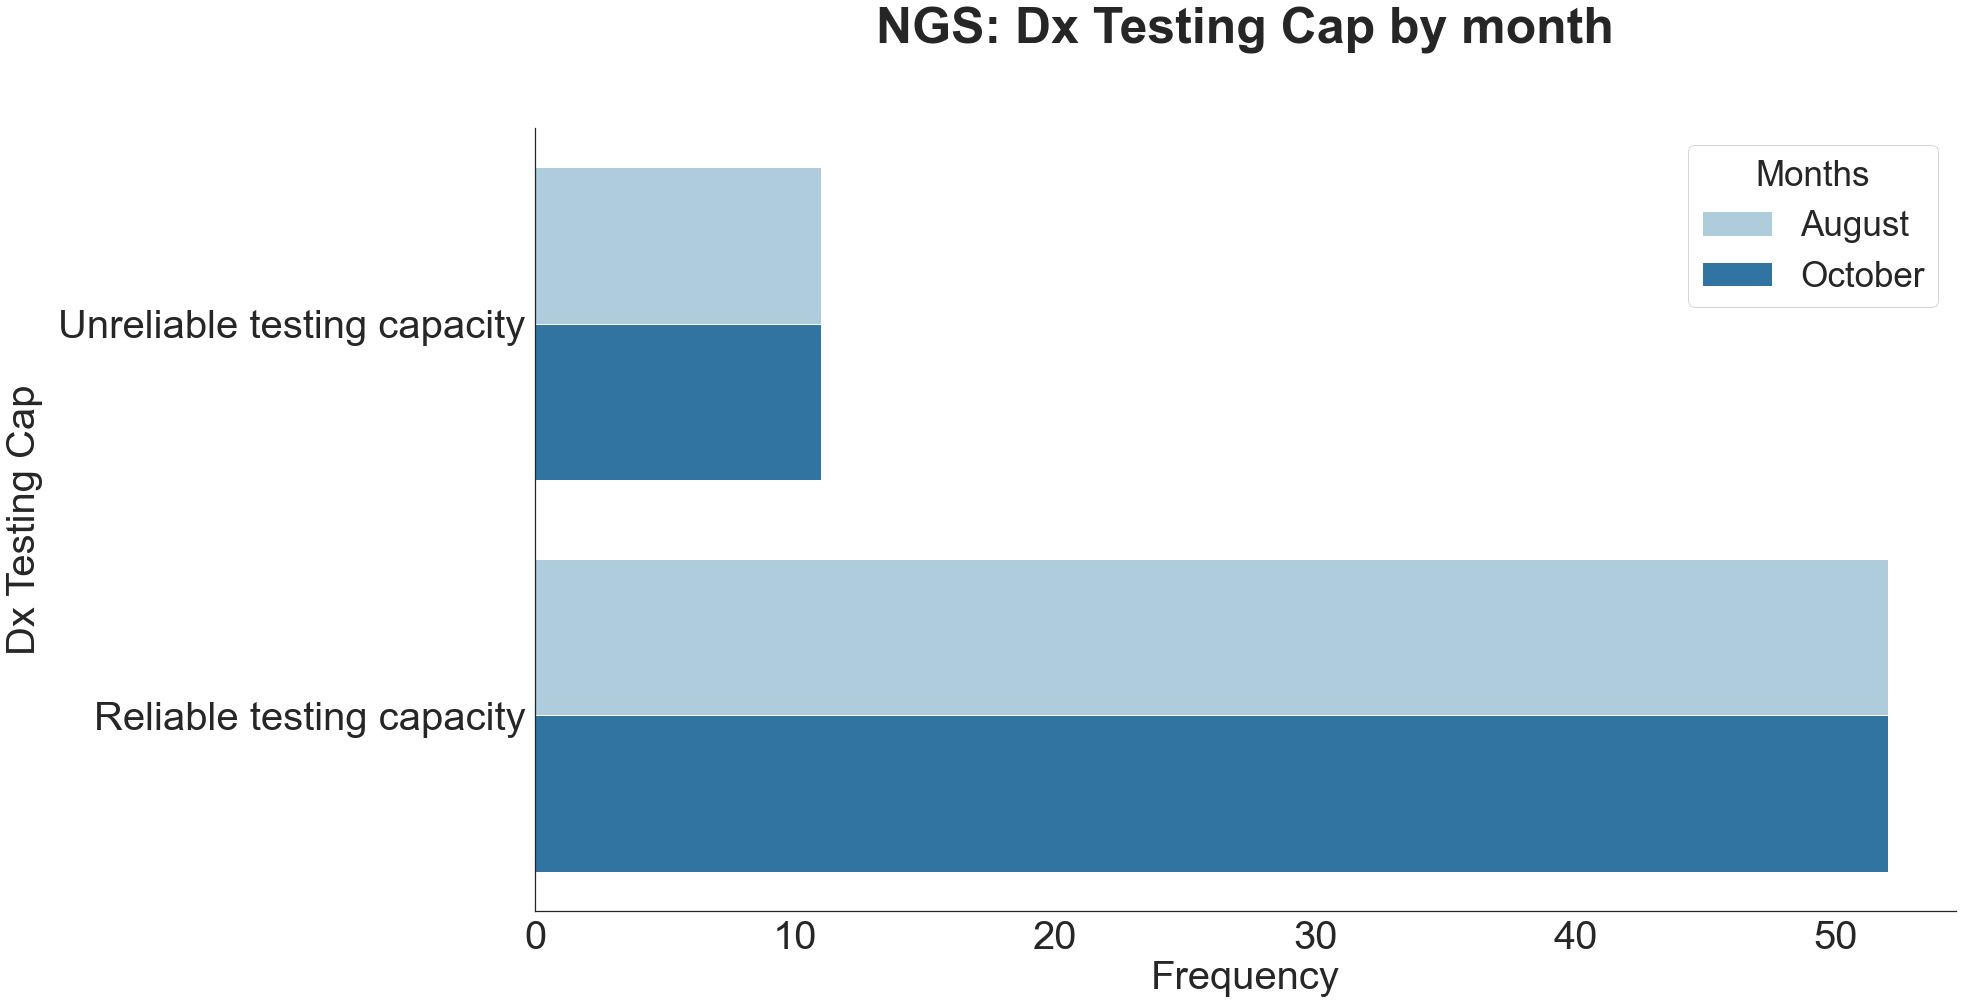

In [831]:
# Plot a bar chart category breakdowns
title = "NGS: Dx Testing Cap by month"

#formatting of the barchart
fig, ax = plt.subplots(1,figsize=(24, 14))
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

# count plot on two categorical variable
sns.countplot(y ='dx_testing_capacity_clean', hue = "month", 
              palette = "Paired", data = stacked_df)

#legend
plt.legend(labels=["August","October"], title = "Months", 
           fontsize = '35', title_fontsize = "35")


#extra formatting
plt.title(title, size = 50, weight='bold', y=1.1)
plt.xlabel("Frequency", size = 40)
plt.ylabel("Dx Testing Cap",
           size = 40,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 40) #size of the words
plt.yticks(size = 40)
#plt.ylim((0, None))

# Sequencing Capacity "Clean"

In [829]:
print("Seq Cap Clean Categories", LMIC_Aug[["sequencing_capacity_clean"]].value_counts().to_markdown())
print("Seq Cap Clean Categories", LMIC_Aug[["sequencing_capacity_clean"]].value_counts(normalize=True))

Seq Cap Clean Categories |                                       |   0 |
|:--------------------------------------|----:|
| ('0 NGS facilities or equivalent',)   |  36 |
| ('1-3 NGS facilities or equivalent',) |  20 |
| ('4+ NGS facilities or equivalent',)  |   7 |
Seq Cap Clean Categories sequencing_capacity_clean       
0 NGS facilities or equivalent      0.571429
1-3 NGS facilities or equivalent    0.317460
4+ NGS facilities or equivalent     0.111111
dtype: float64


In [830]:
print("Seq Cap Clean Categories", LMIC_Oct[["sequencing_capacity_clean"]].value_counts().to_markdown())
print("Seq Cap Clean Categories", LMIC_Oct[["sequencing_capacity_clean"]].value_counts(normalize=True))

Seq Cap Clean Categories |                                       |   0 |
|:--------------------------------------|----:|
| ('0 NGS facilities or equivalent',)   |  36 |
| ('1-3 NGS facilities or equivalent',) |  20 |
| ('4+ NGS facilities or equivalent',)  |   7 |
Seq Cap Clean Categories sequencing_capacity_clean       
0 NGS facilities or equivalent      0.571429
1-3 NGS facilities or equivalent    0.317460
4+ NGS facilities or equivalent     0.111111
dtype: float64


(array([0, 1, 2]),
 [Text(0, 0, '0 NGS facilities or equivalent'),
  Text(0, 1, '1-3 NGS facilities or equivalent'),
  Text(0, 2, '4+ NGS facilities or equivalent')])

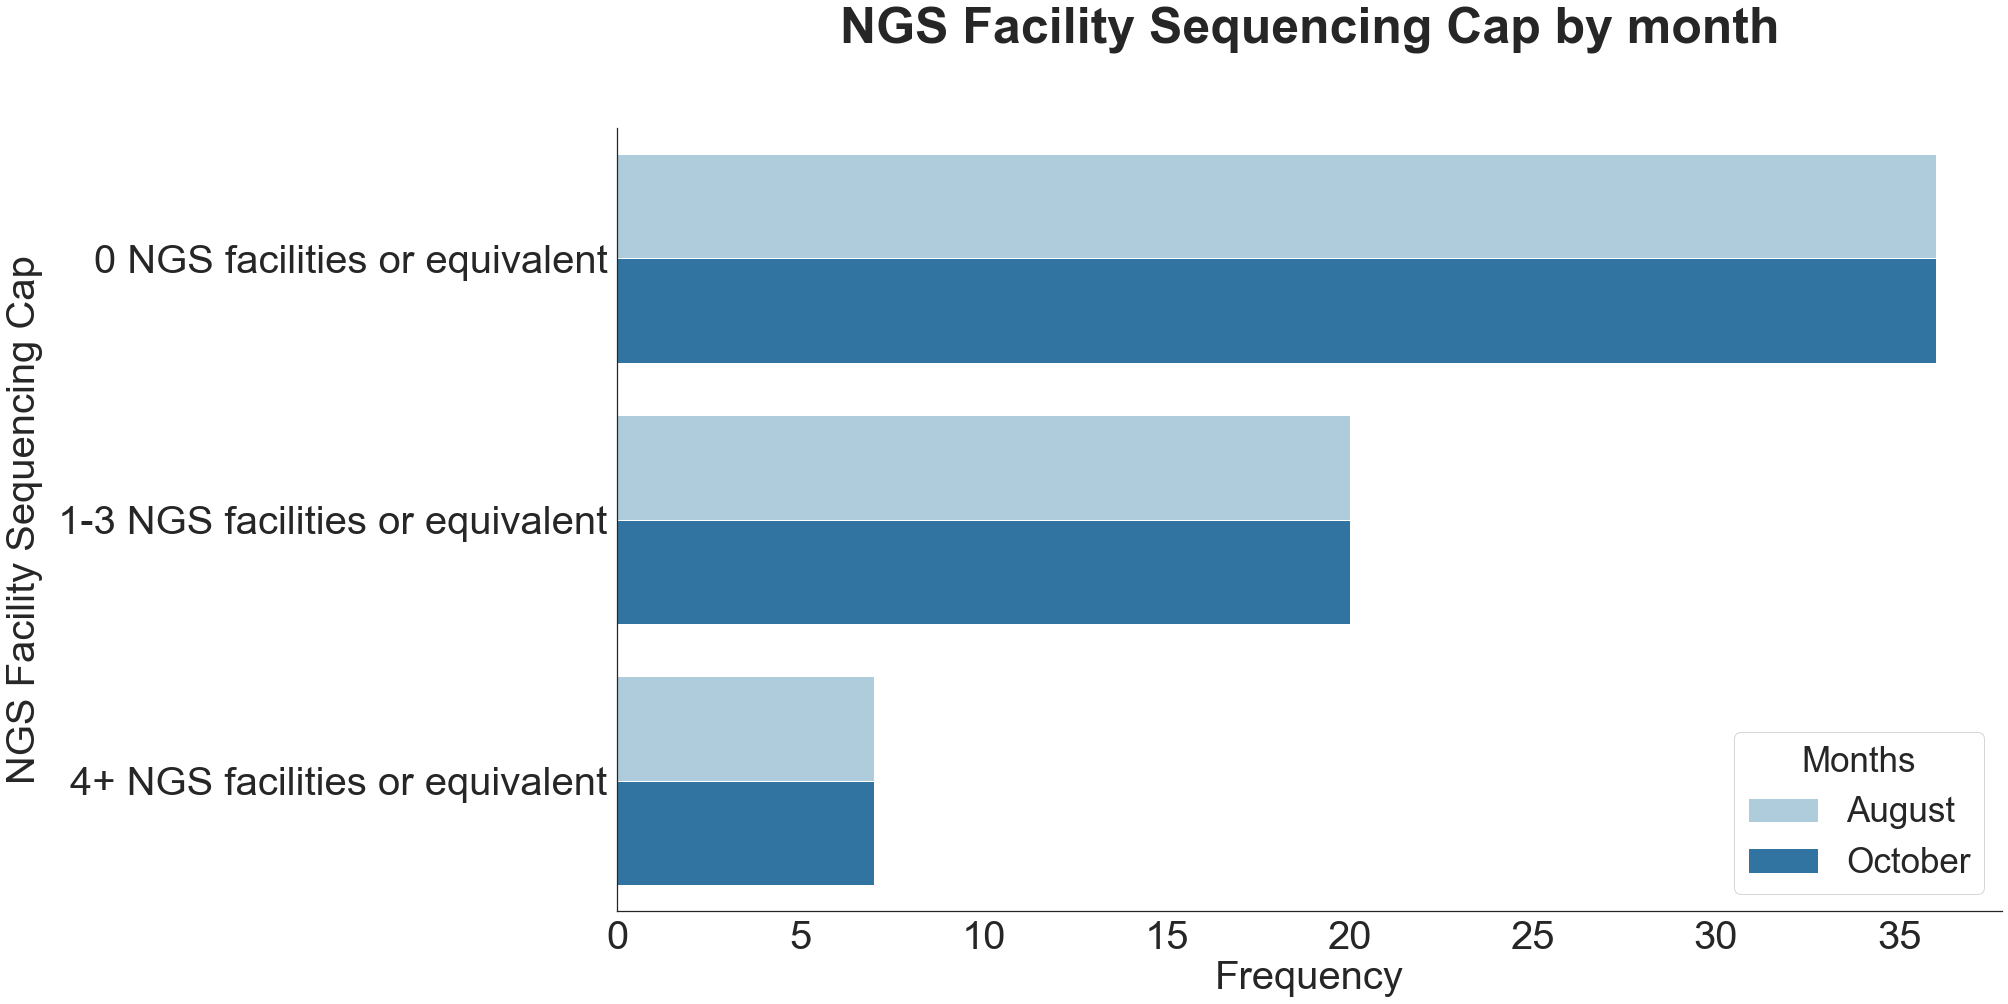

In [832]:
# Plot a bar chart category breakdowns
title = "NGS Facility Sequencing Cap by month"

#formatting of the barchart
fig, ax = plt.subplots(1,figsize=(24, 14))
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

# count plot on two categorical variable
sns.countplot(y ='sequencing_capacity_clean', hue = "month", 
              palette = "Paired", data = stacked_df)

#legend
plt.legend(labels=["August","October"], title = "Months", 
           fontsize = '35', title_fontsize = "35")


#extra formatting
plt.title(title, size = 50, weight='bold', y=1.1)
plt.xlabel("Frequency", size = 40)
plt.ylabel("NGS Facility Sequencing Cap",
           size = 40,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 40) #size of the words
plt.yticks(size = 40)
#plt.ylim((0, None))

# SARS-CoV-2 Sequencing "Clean"

In [834]:
print("SARS-CoV-2 Seq Clean Categories", LMIC_Aug[["sars_cov_2_sequencing_clean"]].value_counts().to_markdown())
print("SARS-CoV-2 Seq Clean Categories", LMIC_Aug[["sars_cov_2_sequencing_clean"]].value_counts(normalize=True))

SARS-CoV-2 Seq Clean Categories |                      |   0 |
|:---------------------|----:|
| ('1-499 sequences',) |  38 |
| ('500+ sequences',)  |  18 |
| ('0 sequences',)     |   7 |
SARS-CoV-2 Seq Clean Categories sars_cov_2_sequencing_clean
1-499 sequences                0.603175
500+ sequences                 0.285714
0 sequences                    0.111111
dtype: float64


In [833]:
print("SARS-CoV-2 Seq Clean Categories", LMIC_Oct [["sars_cov_2_sequencing_clean"]].value_counts().to_markdown())
print("SARS-CoV-2 Seq Clean Categories", LMIC_Oct[["sars_cov_2_sequencing_clean"]].value_counts(normalize=True))

SARS-CoV-2 Seq Clean Categories |                      |   0 |
|:---------------------|----:|
| ('1-499 sequences',) |  37 |
| ('500+ sequences',)  |  24 |
| ('0 sequences',)     |   2 |
SARS-CoV-2 Seq Clean Categories sars_cov_2_sequencing_clean
1-499 sequences                0.587302
500+ sequences                 0.380952
0 sequences                    0.031746
dtype: float64


In [837]:
stacked_df.sort_values(by='sars_cov_2_sequencing_clean', ascending=True, inplace=True)
stacked_df.tail(2)

,country,code,region,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,ngs_capacity,sequencing_capacity,...,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean,month,who_testing_capacity,owid_testing_capacity_cat,archetype_clean
62,Zimbabwe,ZWE,Africa,148.63,77.95,7817.001951,0.102212,Reliable testing capacity,NaN,0 NGS facilities or equivalent,...,3 - Leverage,Leverage,– Leverage existing NGS capacity,Reliable testing capacity,0 NGS facilities or equivalent,500+ sequences,August,1 - Reliable,1 - Reliable,NaN
25,Indonesia,IDN,South-East Asia,2735.24,98.20,10589.969436,0.130296,Reliable testing capacity,2.0,4+ NGS facilities or equivalent,...,4 - Strengthen,Strengthen,– Build additional NGS capacity for scale-up,Reliable testing capacity,4+ NGS facilities or equivalent,500+ sequences,August,1 - Reliable,1 - Reliable,NaN


(array([0, 1, 2]),
 [Text(0, 0, '0 sequences'),
  Text(0, 1, '1-499 sequences'),
  Text(0, 2, '500+ sequences')])

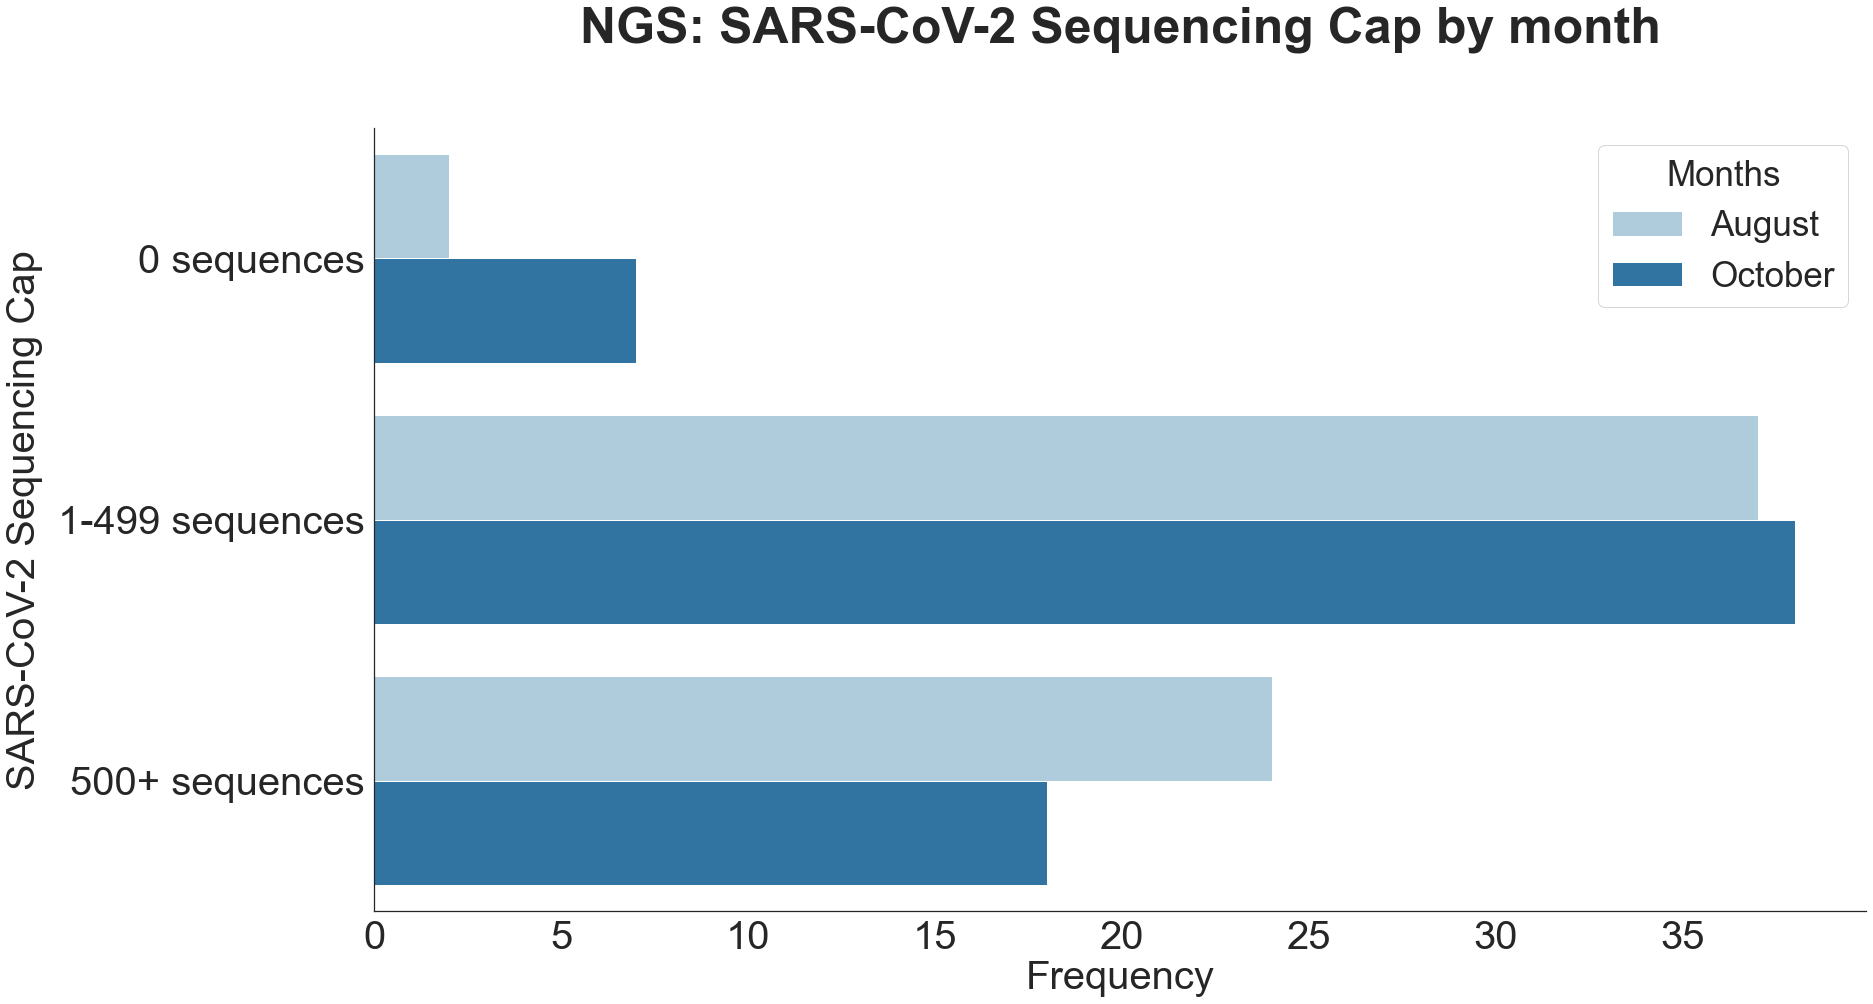

In [838]:
# Plot a bar chart category breakdowns
title = "NGS: SARS-CoV-2 Sequencing Cap by month"

#formatting of the barchart
fig, ax = plt.subplots(1,figsize=(24, 14))
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

# count plot on two categorical variable
sns.countplot(y ='sars_cov_2_sequencing_clean', hue = "month", 
              palette = "Paired", data = stacked_df)

#legend
plt.legend(labels=["August","October"], title = "Months", 
           fontsize = '35', title_fontsize = "35")


#extra formatting
plt.title(title, size = 50, weight='bold', y=1.1)
plt.xlabel("Frequency", size = 40)
plt.ylabel("SARS-CoV-2 Sequencing Cap",
           size = 40,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 40) #size of the words
plt.yticks(size = 40)
#plt.ylim((0, None))

# Reindexing

In [292]:
print (df_Aug.index)
print (df_Oct.index)

Int64Index([  0,   1,   4,   5,   6,   8,   9,  10,  11,  12,
            ...
            258, 259, 260, 261, 262, 263, 264, 265, 266, 267],
           dtype='int64', length=252)
Int64Index([  0,   1,   4,   5,   6,   8,   9,  10,  11,  12,
            ...
            256, 257, 258, 259, 260, 261, 262, 263, 264, 265],
           dtype='int64', length=252)


In [530]:
df_Oct.country.nunique()

252

In [373]:
# Reset index first and drop the original index
df_Aug_reset = df_Aug.reset_index(drop=True)
df_Oct_reset = df_Oct.reset_index(drop=True)

# Use boolean indexing and .ne method on reset index
df_Aug_reset[df_Oct_reset.ne(df_Aug_reset).any(axis=1)]

,country,code,region,who_testing_capacity,owid_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,...,sars_cov_2_sequencing,cases_newly_reported_in_last_7_days_per_100000_population,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean,month
0,Abyei,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,Unreliable testing capacity,...,Low,NaN,NaN,1 - Test,Test,– Increase diagnostic testing capacity,Unreliable testing capacity,0 NGS facilities or equivalent,0 sequences,August
1,Abyei Disputed Boundary,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,Unreliable testing capacity,...,Low,NaN,NaN,1 - Test,Test,– Increase diagnostic testing capacity,Unreliable testing capacity,0 NGS facilities or equivalent,0 sequences,August
2,Abyei Disputed Boundary,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,Unreliable testing capacity,...,Low,NaN,NaN,1 - Test,Test,– Increase diagnostic testing capacity,Unreliable testing capacity,0 NGS facilities or equivalent,0 sequences,August
3,Abyei Disputed Boundary,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,Unreliable testing capacity,...,Low,NaN,NaN,1 - Test,Test,– Increase diagnostic testing capacity,Unreliable testing capacity,0 NGS facilities or equivalent,0 sequences,August
4,Afghanistan,AFG,Eastern Mediterranean,1 - Reliable,1.0,389.28,10.65,1915.595458,0.204025,Reliable testing capacity,...,Low,NaN,Low income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Western Sahara,ESH,NaN,None,NaN,5.97,8.26,534.673367,NaN,Unreliable testing capacity,...,Low,NaN,NaN,1 - Test,Test,– Increase diagnostic testing capacity,Unreliable testing capacity,0 NGS facilities or equivalent,0 sequences,August
264,Western Sahara - Morocco Disputed Boundary,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,Unreliable testing capacity,...,Low,NaN,NaN,1 - Test,Test,– Increase diagnostic testing capacity,Unreliable testing capacity,0 NGS facilities or equivalent,0 sequences,August
265,Yemen,YEM,Eastern Mediterranean,1 - Reliable,1.0,298.26,NaN,0.000000,NaN,Reliable testing capacity,...,Low,NaN,Low income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,0 sequences,August
266,Zambia,ZMB,Africa,1 - Reliable,1.0,183.84,55.74,11901.169495,0.092522,Reliable testing capacity,...,High,NaN,Lower middle income,4 - Strengthen,Strengthen,– Build additional NGS capacity for scale-up,Reliable testing capacity,1-3 NGS facilities or equivalent,500+ sequences,August


# Interested in observing country changes between archetypes and other categorical variables 

- Note that the catagorical variables are:
     - 'who_testing_capacity',
     - 'owid_testing_capacity', 
     - "dx_testing_capacity", 
     - 'sars_cov_2_sequencing_clean', 
     - 'archetype',
     - 'dx_testing_capacity_clean', 
     - 'sequencing_capacity_clean', 

In [ ]:
# Processing

In [849]:
#reset indexs
Aug_Ind_reset = LMIC_Aug.reset_index(drop=True)
Aug_Ind_reset.index

Oct_Ind_reset = LMIC_Oct.reset_index(drop=True)
Oct_Ind_reset.index

RangeIndex(start=0, stop=63, step=1)

In [850]:
#Lets sort by country, as they need to be in the exact same order
Aug_Ind_reset.sort_values(by='country', ascending=False, inplace=True)
Aug_Ind_reset.tail(2)

Oct_Ind_reset.sort_values(by='country', ascending=False, inplace=True)
Oct_Ind_reset.tail(2)

,country,code,region,who_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,ngs_capacity,...,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean,archetype_clean,month,owid_testing_capacity_cat
1,Algeria,DZA,Africa,1 - Reliable,438.51,4.46,525.764521,0.891131,Reliable testing capacity,NaN,...,Lower middle income,2 - Connect,Connect,� Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,Connect,October,1 - Reliable
0,Afghanistan,AFG,Eastern Mediterranean,1 - Reliable,389.28,10.65,1970.843609,0.203075,Reliable testing capacity,NaN,...,Low income,2 - Connect,Connect,� Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,Connect,October,0 - Unreliable


- WHO Testing Capacity
    - Results:
        - No country changes between months

In [898]:
#only keeping necessary variables from this dataset, for our observations
Aug_WHO = Aug_Ind_reset[['country', "who_testing_capacity"]]
Oct_WHO = Oct_Ind_reset[['country', "who_testing_capacity"]]
Oct_WHO.shape

(63, 2)

In [899]:
df_Aug.who_testing_capacity.unique()

array([nan,  1.,  0.])

In [900]:
print ("aug WHO testing:", Aug_WHO.who_testing_capacity.value_counts())
print ("oct WHO testing:", Oct_WHO.who_testing_capacity.value_counts())      

aug WHO testing: 1 - Reliable      49
0 - Unreliable    14
Name: who_testing_capacity, dtype: int64
oct WHO testing: 1 - Reliable      49
0 - Unreliable    14
Name: who_testing_capacity, dtype: int64


In [901]:
# Need to rename main category since we are merging on it but we want
# it to show as different columns post-merge
Oct_WHO_renamed = Oct_WHO.rename({'who_testing_capacity': 'who_testing_capacity_new'}, axis=1)
Oct_WHO_renamed.head()

,country,who_testing_capacity_new
62,Zimbabwe,1 - Reliable
61,Zambia,1 - Reliable
60,Vietnam,1 - Reliable
59,Vanuatu,1 - Reliable
58,Uzbekistan,1 - Reliable


In [902]:
Aug_WHO.tail()

,country,who_testing_capacity
4,Belize,0 - Unreliable
3,Bangladesh,1 - Reliable
2,Angola,1 - Reliable
1,Algeria,1 - Reliable
0,Afghanistan,1 - Reliable


In [903]:
#merge together dataset
merged_WHO = Oct_WHO_renamed.merge(Aug_WHO, how='left', 
                    left_on=['country','who_testing_capacity_new'],
                    right_on=['country','who_testing_capacity'])
merged_WHO.head()

,country,who_testing_capacity_new,who_testing_capacity
0,Zimbabwe,1 - Reliable,1 - Reliable
1,Zambia,1 - Reliable,1 - Reliable
2,Vietnam,1 - Reliable,1 - Reliable
3,Vanuatu,1 - Reliable,1 - Reliable
4,Uzbekistan,1 - Reliable,1 - Reliable


In [905]:
merged_WHO[merged_WHO['who_testing_capacity'].isna()]

,country,who_testing_capacity_new,who_testing_capacity


- OWID Testing Capacity
    - Results
        - Countries: Mozambique, Central African Republic, Afghanistan

In [908]:
#only keeping necessary variables from this dataset, for our observations
Aug_OWID = Aug_Ind_reset[['country', "owid_testing_capacity_cat"]]
Oct_OWID = Oct_Ind_reset[['country', "owid_testing_capacity_cat"]]
Oct_OWID.shape

(63, 2)

In [910]:
print ("aug OWID testing:", Aug_OWID.owid_testing_capacity_cat.value_counts())
print ("oct OWID testing:", Oct_OWID.owid_testing_capacity_cat.value_counts())      

aug OWID testing: 1 - Reliable    60
Name: owid_testing_capacity_cat, dtype: int64
oct OWID testing: 1 - Reliable      57
0 - Unreliable     3
Name: owid_testing_capacity_cat, dtype: int64


In [911]:
# Need to rename main category since we are merging on it but we want
# it to show as different columns post-merge
Oct_OWID_renamed = Oct_OWID.rename({'owid_testing_capacity_cat': 'owid_testing_capacity_new'}, axis=1)
Oct_OWID_renamed.head()

,country,owid_testing_capacity_new
62,Zimbabwe,1 - Reliable
61,Zambia,1 - Reliable
60,Vietnam,1 - Reliable
59,Vanuatu,1 - Reliable
58,Uzbekistan,1 - Reliable


In [912]:
Aug_OWID.head()

,country,owid_testing_capacity_cat
62,Zimbabwe,1 - Reliable
61,Zambia,1 - Reliable
60,Vietnam,1 - Reliable
59,Vanuatu,1 - Reliable
58,Uzbekistan,1 - Reliable


In [913]:
#merge together dataset
merged_OWID = Oct_OWID_renamed.merge(Aug_OWID, how='left', 
                    left_on=['country','owid_testing_capacity_new'],
                    right_on=['country','owid_testing_capacity_cat'])
merged_OWID.head()

,country,owid_testing_capacity_new,owid_testing_capacity_cat
0,Zimbabwe,1 - Reliable,1 - Reliable
1,Zambia,1 - Reliable,1 - Reliable
2,Vietnam,1 - Reliable,1 - Reliable
3,Vanuatu,1 - Reliable,1 - Reliable
4,Uzbekistan,1 - Reliable,1 - Reliable


In [914]:
merged_OWID[merged_OWID['owid_testing_capacity_cat'].isna()]

,country,owid_testing_capacity_new,owid_testing_capacity_cat
16,Samoa,None,None
26,Mozambique,0 - Unreliable,NaN
41,Guinea-Bissau,None,None
50,Comoros,None,None
52,Central African Republic,0 - Unreliable,NaN
62,Afghanistan,0 - Unreliable,NaN


In [923]:
#check
Comparison_owid_1 = Aug_OWID.loc[(Aug_OWID['country'] == 'Afghanistan')]
Comparison_owid_1.head(4)

,country,owid_testing_capacity_cat
0,Afghanistan,1 - Reliable


In [922]:
#check
Comparison_owid_2 = Oct_OWID.loc[(Oct_OWID['country'] == 'Afghanistan')]
Comparison_owid_2.head(4)

,country,owid_testing_capacity_cat
0,Afghanistan,0 - Unreliable


- Dx Testing Capacity
    - Results
        - No changes between countries

In [924]:
#only keeping necessary variables from this dataset, for our observations
Aug_Dx = Aug_Ind_reset[['country', "dx_testing_capacity"]]
Oct_Dx = Oct_Ind_reset[['country', "dx_testing_capacity"]]
Oct_Dx.shape

(63, 2)

In [925]:
print ("aug dx testing:", Aug_Dx.dx_testing_capacity.value_counts())
print ("oct dx testing:", Oct_Dx.dx_testing_capacity.value_counts())      

aug dx testing: Reliable testing capacity      52
Unreliable testing capacity    11
Name: dx_testing_capacity, dtype: int64
oct dx testing: Reliable testing capacity      52
Unreliable testing capacity    11
Name: dx_testing_capacity, dtype: int64


In [926]:
# Need to rename main category since we are merging on it but we want
# it to show as different columns post-merge
Oct_Dx_renamed = Oct_Dx.rename({'dx_testing_capacity': 'dx_testing_capacity_new'}, axis=1)
Oct_Dx_renamed.head()

,country,dx_testing_capacity_new
62,Zimbabwe,Reliable testing capacity
61,Zambia,Reliable testing capacity
60,Vietnam,Reliable testing capacity
59,Vanuatu,Reliable testing capacity
58,Uzbekistan,Reliable testing capacity


In [927]:
Aug_Dx.head()

,country,dx_testing_capacity
62,Zimbabwe,Reliable testing capacity
61,Zambia,Reliable testing capacity
60,Vietnam,Reliable testing capacity
59,Vanuatu,Reliable testing capacity
58,Uzbekistan,Reliable testing capacity


In [928]:
#merge together dataset
merged_dx = Oct_Dx_renamed.merge(Aug_Dx, how='left', 
                    left_on=['country','dx_testing_capacity_new'],
                    right_on=['country','dx_testing_capacity'])
merged_dx.head()

,country,dx_testing_capacity_new,dx_testing_capacity
0,Zimbabwe,Reliable testing capacity,Reliable testing capacity
1,Zambia,Reliable testing capacity,Reliable testing capacity
2,Vietnam,Reliable testing capacity,Reliable testing capacity
3,Vanuatu,Reliable testing capacity,Reliable testing capacity
4,Uzbekistan,Reliable testing capacity,Reliable testing capacity


In [929]:
merged_dx[merged_dx['dx_testing_capacity'].isna()]

,country,dx_testing_capacity_new,dx_testing_capacity


- SARS-CoV-2 Sequencing Clean
    - Results:
        - Country changes:
             - Vietnam: 1-499 --> 500+
            - Vanuatu: 0 --> 1-499
            - Suriname: 1-499 --> 500+
            - Sudan: 0 --> 1-499
            - Solomon Islands: 0 --> 1-499
            - Rwanda: 1-499 --> 500+
            - Pakistan: 1-499 --> 500+
            - Mozambique: 1-499 --> 500+
            - Malawi: 1-499 --> 500+
            - Madagascar: 1-499 --> 500+
            - Liberia: 0 --> 1-499
            - Laos: 0 --> 1-499
            - Kosovo: 1-499 --> 500+
            - Guatemala: 1-499 --> 500+
            - Fiji: 0 --> 500+

In [931]:
#Split: only keeping necessary variables from this dataset, for our observations
Aug_Sequ_Cap = Aug_Ind_reset[['country', "sars_cov_2_sequencing_clean"]]
Oct_Sequ_Cap = Oct_Ind_reset[['country', "sars_cov_2_sequencing_clean"]]
Oct_Sequ_Cap.shape

(63, 2)

In [852]:
print ('oct sequ cap:', Oct_Sequ_Cap.sars_cov_2_sequencing_clean.value_counts())
print ("aug seq cap:", Aug_Sequ_Cap.sars_cov_2_sequencing_clean.value_counts())

oct sequ cap: 1-499 sequences    37
500+ sequences     24
0 sequences         2
Name: sars_cov_2_sequencing_clean, dtype: int64
aug seq cap: 1-499 sequences    38
500+ sequences     18
0 sequences         7
Name: sars_cov_2_sequencing_clean, dtype: int64


In [853]:
# Need to rename main category since we are merging on it but we want
# it to show as different columns post-merge
Oct_Sequ_renamed = Oct_Sequ_Cap.rename({'sars_cov_2_sequencing_clean': 'sars_cov_2_sequencing_new'}, axis=1)
Oct_Sequ_renamed.head()

,country,sars_cov_2_sequencing_new
62,Zimbabwe,500+ sequences
61,Zambia,500+ sequences
60,Vietnam,500+ sequences
59,Vanuatu,1-499 sequences
58,Uzbekistan,1-499 sequences


In [854]:
Aug_Sequ_Cap.head()
#this dataframe uses entirely different categories

,country,sars_cov_2_sequencing_clean
62,Zimbabwe,500+ sequences
61,Zambia,500+ sequences
60,Vietnam,1-499 sequences
59,Vanuatu,0 sequences
58,Uzbekistan,1-499 sequences


In [855]:
#merge together dataset
merged_seq = Oct_Sequ_renamed.merge(Aug_Sequ_Cap, how='left', 
                    left_on=['country','sars_cov_2_sequencing_new'],
                    right_on=['country','sars_cov_2_sequencing_clean'])
merged_seq.head()

,country,sars_cov_2_sequencing_new,sars_cov_2_sequencing_clean
0,Zimbabwe,500+ sequences,500+ sequences
1,Zambia,500+ sequences,500+ sequences
2,Vietnam,500+ sequences,NaN
3,Vanuatu,1-499 sequences,NaN
4,Uzbekistan,1-499 sequences,1-499 sequences


In [856]:
merged_seq[merged_seq['sars_cov_2_sequencing_clean'].isna()]

,country,sars_cov_2_sequencing_new,sars_cov_2_sequencing_clean
2,Vietnam,500+ sequences,NaN
3,Vanuatu,1-499 sequences,NaN
10,Sudan,1-499 sequences,NaN
13,Solomon Islands,1-499 sequences,NaN
17,Rwanda,500+ sequences,NaN
21,Pakistan,500+ sequences,NaN
26,Mozambique,500+ sequences,NaN
30,Malawi,500+ sequences,NaN
31,Madagascar,500+ sequences,NaN
32,Liberia,1-499 sequences,NaN


In [878]:
Comparison_seq_1 = Aug_Sequ_Cap.loc[(Aug_Sequ_Cap['country'] == 'Laos')]
Comparison_seq_1.head(4)

,country,sars_cov_2_sequencing_clean
28,Laos,0 sequences


In [877]:
Comparison_seq_2 = Oct_Sequ_Cap.loc[(Oct_Sequ_Cap['country'] == 'Laos')]
Comparison_seq_2.head(4)

,country,sars_cov_2_sequencing_clean
28,Laos,1-499 sequences


- Archetypes
    - Results
        - Country changes:
            - Vietnam: Leverage --> Strengthen
            - Rwanda: Connect --> Leverage
            - Pakistan: Leverage --> Strengthen
            - Mozambique: Connect --> Leverage	
            - Malawi: Connect --> Leverage
            - Madagascar: Leverage --> Strengthen

In [879]:
#only keeping necessary variables from this dataset, for our observations
Aug_Arch = Aug_Ind_reset[['country', "archetype"]]
Oct_Arch = Oct_Ind_reset[['country', "archetype"]]
Oct_Arch.shape

(63, 2)

In [932]:
Aug_Arch.archetype.value_counts()

Connect       24
Strengthen    15
Leverage      13
Test          11
Name: archetype, dtype: int64

In [933]:
Oct_Arch.archetype.value_counts()

Connect       21
Strengthen    18
Leverage      13
Test          11
Name: archetype, dtype: int64

In [936]:
# Need to rename Rings since we are merging on it but we want
# it to show as different columns post-merge
Oct_Arch_renamed = Oct_Arch.rename({'archetype': 'archetype_new'}, axis=1)
Oct_Arch_renamed.head()

,country,archetype_new
62,Zimbabwe,Leverage
61,Zambia,Strengthen
60,Vietnam,Strengthen
59,Vanuatu,Connect
58,Uzbekistan,Connect


In [937]:
Aug_Arch.head()

,country,archetype
62,Zimbabwe,Leverage
61,Zambia,Strengthen
60,Vietnam,Leverage
59,Vanuatu,Connect
58,Uzbekistan,Connect


In [938]:
#merge together dataset
merged_arch = Oct_Arch_renamed.merge(Aug_Arch, how='left', 
                    left_on=['country','archetype_new'],
                    right_on=['country','archetype'])
merged_arch.head()

,country,archetype_new,archetype
0,Zimbabwe,Leverage,Leverage
1,Zambia,Strengthen,Strengthen
2,Vietnam,Strengthen,NaN
3,Vanuatu,Connect,Connect
4,Uzbekistan,Connect,Connect


In [939]:
merged_arch[merged_arch['archetype'].isna()]
#merged_arch[merged_arch['archetype'].isna()].nunique()
#33 countries switching groups using "archetype"

,country,archetype_new,archetype
2,Vietnam,Strengthen,NaN
17,Rwanda,Leverage,NaN
21,Pakistan,Strengthen,NaN
26,Mozambique,Leverage,NaN
30,Malawi,Leverage,NaN
31,Madagascar,Strengthen,NaN


In [897]:
Comparison_arch_1 = Aug_Arch.loc[(Aug_Arch['country'] == 'Madagascar')]
Comparison_arch_1.head(4)

,country,archetype
31,Madagascar,Leverage


In [896]:
Comparison_arch_2 = Oct_Arch.loc[(Oct_Arch['country'] == 'Madagascar')]
Comparison_arch_2.head(4)

,country,archetype
31,Madagascar,Strengthen


In [524]:
Comparison_arch_3 = stacked_df.loc[(stacked_df['country'] == 'South Sudan')]
Comparison_arch_3.head(4)

,country,code,region,who_testing_capacity,owid_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,...,cases_newly_reported_in_last_7_days_per_100000_population,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean,month,archetype_clean
217,South Sudan,SSD,Africa,1 - Reliable,1.0,111.94,14.4,2108.995891,0.047420,Reliable testing capacity,...,NaN,Low income,3 - Leverage,Leverage,– Leverage existing NGS capacity,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,August,NaN
477,South Sudan,SSD,Africa,1 - Reliable,1.0,111.94,14.4,2428.157942,0.045069,Reliable testing capacity,...,0.64,Low income,2 - Connect,Connect,� Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,October,Connect


In [963]:
# Export combined table
# send sheets to Leo

stacked_df.to_csv('C:\\Users\\bthrift\\Documents\\Projects\\NGS Map\\NGS underlying data\\Flourish\\NGS_August_Oct_Data.csv', 
                  index=True, sep=',')

In [1102]:
#import new find_map and join on august geometric polygons and export
df_find_map = pd.read_csv ("C:\\Users\\bthrift\\Documents\\Projects\\NGS Map\\NGS underlying data\\Python\\find_map.csv")
df_find_map.drop('geometry', inplace=True, axis=1)
df_find_map.head()

,country,code,region,who_testing_capacity,owid_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,ngs_capacity,sequencing_capacity,total_sequences,submission_count,total_viable_sequences,all_cases,percent_cases_sequenced,sequences_per_capita_per_100k,sars_cov_2_sequencing,cases_newly_reported_in_last_7_days_per_100000_population,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean,archetype_clean
0,Afghanistan,AFG,Eastern Mediterranean,1 - Reliable,0.0,389.28,10.65,1970.843609,0.203075,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,94,99,94.0,155764.0,0.06,0.24,1-499 sequences,0.63,Low income,2 - Connect,Connect,� Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,Connect
1,Albania,ALB,Europe,1 - Reliable,1.0,28.78,190.16,43816.504517,0.141791,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,42,42,42.0,177971.0,0.02,1.46,1-499 sequences,103.62,Upper middle income,2 - Connect,Connect,� Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,Connect
2,Algeria,DZA,Africa,1 - Reliable,1.0,438.51,4.46,525.764521,0.891131,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,72,72,60.0,205286.0,0.04,0.16,1-499 sequences,1.66,Lower middle income,2 - Connect,Connect,� Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,Connect
3,American Samoa,ASM,Western Pacific,0 - Unreliable,NaN,NaN,NaN,NaN,NaN,Unreliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,0,0,NaN,NaN,NaN,NaN,0 sequences,0.00,Upper middle income,1 - Test,Test,� Increase diagnostic testing capacity,Unreliable testing capacity,0 NGS facilities or equivalent,0 sequences,Test
4,Andorra,AND,Europe,1 - Reliable,1.0,0.77,11029.48,441271.428571,0.045232,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,29,29,29.0,15338.0,0.19,37.49,1-499 sequences,38.83,High income,0 - High Income*,High Income*,NaN,High Income*,High Income*,High Income*,Connect


In [1103]:
df_find_map.shape

(238, 28)

In [1110]:
#import new find_map and join on august geometric polygons and export
df_file_geo = pd.read_table ("C:\\Users\\bthrift\\Documents\\Projects\\NGS Map\\NGS underlying data\\Flourish\\geometry_flourish.txt", sep='\t')
df_geometry = df_file_geo[['code', "geometry"]]
df_geometry.head(2)

,code,geometry
0,NaN,"{""type"":""Polygon"",""coordinates"":[[[28.04511,9...."
1,NaN,"{""type"":""Polygon"",""coordinates"":[[[28.04511,9...."


In [1111]:
df_geometry.shape

(722, 2)

In [1018]:
df_geometry.dtypes

code        object
geometry    object
dtype: object

In [1075]:
#adding in curly braces {{}} in beginning and end of each row for "geometry" column
df_geometry['geometry'] = '{{' + df_geometry['geometry'].astype(str)
df_geometry['geometry'] = df_geometry['geometry'].astype(str) + '}}'
df_geometry['geometry'] = df_geometry['geometry'].astype(str) + ','
df_geometry.head()

<ipython-input-1075-a9bb01d0398b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geometry['geometry'] = '{{' + df_geometry['geometry'].astype(str)
<ipython-input-1075-a9bb01d0398b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geometry['geometry'] = df_geometry['geometry'].astype(str) + '}}'
<ipython-input-1075-a9bb01d0398b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,code,geometry
0,NaN,"{{{""type"":""Polygon"",""coordinates"":[[[28.04511,..."
1,NaN,"{{{""type"":""Polygon"",""coordinates"":[[[27.825309..."
2,NaN,"{{{""type"":""MultiPolygon"",""coordinates"":[[[[28...."
3,NaN,"{{{""type"":""Polygon"",""coordinates"":[[[28.328673..."
4,AFG,"{{{""type"":""Polygon"",""coordinates"":[[[74.892307..."


In [1076]:
#replace }}" with just curly brackets
df_geometry ['geometry'] = df_geometry ['geometry'].str.replace('}}"',' "}},')
df_geometry.head()

<ipython-input-1076-20c88dc8e810>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_geometry ['geometry'] = df_geometry ['geometry'].str.replace('}}"',' "}},')
<ipython-input-1076-20c88dc8e810>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geometry ['geometry'] = df_geometry ['geometry'].str.replace('}}"',' "}},')


,code,geometry
0,NaN,"{{{""type"":""Polygon"",""coordinates"":[[[28.04511,..."
1,NaN,"{{{""type"":""Polygon"",""coordinates"":[[[27.825309..."
2,NaN,"{{{""type"":""MultiPolygon"",""coordinates"":[[[[28...."
3,NaN,"{{{""type"":""Polygon"",""coordinates"":[[[28.328673..."
4,AFG,"{{{""type"":""Polygon"",""coordinates"":[[[74.892307..."


In [1098]:
#df_geometry ['geometry'] = df_geometry ['geometry'].str.replace('[}}"','"}}')
df_geometry.head()
Where_geometry_is_weird = df_geometry.loc[(df_geometry['code'] == 'USA')]
Where_geometry_is_weird.head(4)

,code,geometry
688,USA,"{""type"":""MultiPolygon"",""coordinates"":[[[[-88.6..."


In [1117]:
df_find_map.head()

,country,code,region,who_testing_capacity,owid_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,ngs_capacity,sequencing_capacity,total_sequences,submission_count,total_viable_sequences,all_cases,percent_cases_sequenced,sequences_per_capita_per_100k,sars_cov_2_sequencing,cases_newly_reported_in_last_7_days_per_100000_population,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean,archetype_clean
0,Afghanistan,AFG,Eastern Mediterranean,1 - Reliable,0.0,389.28,10.65,1970.843609,0.203075,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,94,99,94.0,155764.0,0.06,0.24,1-499 sequences,0.63,Low income,2 - Connect,Connect,� Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,Connect
1,Albania,ALB,Europe,1 - Reliable,1.0,28.78,190.16,43816.504517,0.141791,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,42,42,42.0,177971.0,0.02,1.46,1-499 sequences,103.62,Upper middle income,2 - Connect,Connect,� Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,Connect
2,Algeria,DZA,Africa,1 - Reliable,1.0,438.51,4.46,525.764521,0.891131,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,72,72,60.0,205286.0,0.04,0.16,1-499 sequences,1.66,Lower middle income,2 - Connect,Connect,� Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences,Connect
3,American Samoa,ASM,Western Pacific,0 - Unreliable,NaN,NaN,NaN,NaN,NaN,Unreliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,0,0,NaN,NaN,NaN,NaN,0 sequences,0.00,Upper middle income,1 - Test,Test,� Increase diagnostic testing capacity,Unreliable testing capacity,0 NGS facilities or equivalent,0 sequences,Test
4,Andorra,AND,Europe,1 - Reliable,1.0,0.77,11029.48,441271.428571,0.045232,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,29,29,29.0,15338.0,0.19,37.49,1-499 sequences,38.83,High income,0 - High Income*,High Income*,NaN,High Income*,High Income*,High Income*,Connect


In [1137]:
df_geometry.head()
#Drop countries with Nan country_code
df_geometry_test = df_geometry[df_geometry['code'].notna()]
df_geometry_test.drop_duplicates(subset = ['code'], inplace=True)

df_geometry_test.nunique()

<ipython-input-1137-cc08b08158a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geometry_test.drop_duplicates(subset = ['code'], inplace=True)


code        237
geometry    236
dtype: int64

In [1145]:
#merge together dataset
df_file_geo = df_find_map.merge(df_geometry_test, how = 'left', on = 'code')
NGS_flourish_file.head(2)

,geometry,country,code,region,who_testing_capacity,owid_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,ngs_capacity,sequencing_capacity,total_sequences,submission_count,total_viable_sequences,all_cases,percent_cases_sequenced,sequences_per_capita_per_100k,sars_cov_2_sequencing,cases_newly_reported_in_last_7_days_per_100000_population,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean
0,"{""type"":""Polygon"",""coordinates"":[[[74.892307,3...",Afghanistan,AFG,Eastern Mediterranean,1 - Reliable,0.0,389.28,10.65,1970.843609,0.203075,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,94,99,94.0,155764.0,0.06,0.24,1-499 sequences,0.63,Low income,2 - Connect,Connect,� Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences
1,"{""type"":""Polygon"",""coordinates"":[[[20.943662,4...",Albania,ALB,Europe,1 - Reliable,1.0,28.78,190.16,43816.504517,0.141791,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,42,42,42.0,177971.0,0.02,1.46,1-499 sequences,103.62,Upper middle income,2 - Connect,Connect,� Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences


In [1146]:
# assessing duplicates in country
print("num of country dups:", NGS_flourish_file.duplicated(subset=['code']).nunique())

#Drop countries with Nan country_code
#df_Aug_clean_countries = df_Aug[df_Aug['code'].notna()]

#print("shape of original August data:", df_Aug.shape)
#print ("shape of country_code cleaned August data:", df_Aug_clean_countries.shape
       

num of country dups: 2


In [1147]:
#NGS_flourish_file.code.isna().unique()

Where_geometry_is_weird_2 = NGS_flourish_file.loc[(NGS_flourish_file['code']).isna()]
Where_geometry_is_weird_2.head(4)

,geometry,country,code,region,who_testing_capacity,owid_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,ngs_capacity,sequencing_capacity,total_sequences,submission_count,total_viable_sequences,all_cases,percent_cases_sequenced,sequences_per_capita_per_100k,sars_cov_2_sequencing,cases_newly_reported_in_last_7_days_per_100000_population,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean


In [1148]:
NGS_flourish_file = df_file_geo[['geometry', "country", 
                                'code', 'region', 'who_testing_capacity', 'owid_testing_capacity',
                                'pop_100k', 'max_new_tests_cap_avg', 'cap_cum_tests', 'cum_tpr',
                                'dx_testing_capacity', 'ngs_capacity', 'sequencing_capacity', 'total_sequences',
                                'submission_count', 'total_viable_sequences', 'all_cases', 'percent_cases_sequenced',
                                'sequences_per_capita_per_100k', 'sars_cov_2_sequencing', 'cases_newly_reported_in_last_7_days_per_100000_population',
                                'world_bank_economies', 'archetype_full', 'archetype', 'label', 'dx_testing_capacity_clean', 
                                'sequencing_capacity_clean', 'sars_cov_2_sequencing_clean']]
NGS_flourish_file.head()

,geometry,country,code,region,who_testing_capacity,owid_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,ngs_capacity,sequencing_capacity,total_sequences,submission_count,total_viable_sequences,all_cases,percent_cases_sequenced,sequences_per_capita_per_100k,sars_cov_2_sequencing,cases_newly_reported_in_last_7_days_per_100000_population,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean
0,"{""type"":""Polygon"",""coordinates"":[[[74.892307,3...",Afghanistan,AFG,Eastern Mediterranean,1 - Reliable,0.0,389.28,10.65,1970.843609,0.203075,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,94,99,94.0,155764.0,0.06,0.24,1-499 sequences,0.63,Low income,2 - Connect,Connect,� Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences
1,"{""type"":""Polygon"",""coordinates"":[[[20.943662,4...",Albania,ALB,Europe,1 - Reliable,1.0,28.78,190.16,43816.504517,0.141791,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,42,42,42.0,177971.0,0.02,1.46,1-499 sequences,103.62,Upper middle income,2 - Connect,Connect,� Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences
2,"{""type"":""Polygon"",""coordinates"":[[[-8.681222,2...",Algeria,DZA,Africa,1 - Reliable,1.0,438.51,4.46,525.764521,0.891131,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,72,72,60.0,205286.0,0.04,0.16,1-499 sequences,1.66,Lower middle income,2 - Connect,Connect,� Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences
3,"{""type"":""MultiPolygon"",""coordinates"":[[[[-170....",American Samoa,ASM,Western Pacific,0 - Unreliable,NaN,NaN,NaN,NaN,NaN,Unreliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,0,0,NaN,NaN,NaN,NaN,0 sequences,0.00,Upper middle income,1 - Test,Test,� Increase diagnostic testing capacity,Unreliable testing capacity,0 NGS facilities or equivalent,0 sequences
4,"{""type"":""Polygon"",""coordinates"":[[[1.429297,42...",Andorra,AND,Europe,1 - Reliable,1.0,0.77,11029.48,441271.428571,0.045232,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,29,29,29.0,15338.0,0.19,37.49,1-499 sequences,38.83,High income,0 - High Income*,High Income*,NaN,High Income*,High Income*,High Income*


In [1149]:
NGS_flourish_file.shape

(238, 28)

In [1150]:
#extra transformations
# Transforming categorical values to be the same between both datasets
def num (x):
    if x == '� Increase diagnostic testing capacity':
        return '– Increase diagnostic testing capacity' 
    elif x == '� Set-up sample referral networks or build NGS capacity from scratch':
        return '– Set-up sample referral networks or build NGS capacity from scratch'
    elif x == '� Leverage existing NGS capacity':
        return '– Leverage existing NGS capacity'
    elif x =='� Build additional NGS capacity for scale-up':
        return '– Build additional NGS capacity for scale-up'
    
NGS_flourish_file['label'] = NGS_flourish_file['label'].apply(lambda x : num (x))
NGS_flourish_file.head(2)

<ipython-input-1150-27e90fc05035>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NGS_flourish_file['label'] = NGS_flourish_file['label'].apply(lambda x : num (x))


,geometry,country,code,region,who_testing_capacity,owid_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,ngs_capacity,sequencing_capacity,total_sequences,submission_count,total_viable_sequences,all_cases,percent_cases_sequenced,sequences_per_capita_per_100k,sars_cov_2_sequencing,cases_newly_reported_in_last_7_days_per_100000_population,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean
0,"{""type"":""Polygon"",""coordinates"":[[[74.892307,3...",Afghanistan,AFG,Eastern Mediterranean,1 - Reliable,0.0,389.28,10.65,1970.843609,0.203075,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,94,99,94.0,155764.0,0.06,0.24,1-499 sequences,0.63,Low income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences
1,"{""type"":""Polygon"",""coordinates"":[[[20.943662,4...",Albania,ALB,Europe,1 - Reliable,1.0,28.78,190.16,43816.504517,0.141791,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,42,42,42.0,177971.0,0.02,1.46,1-499 sequences,103.62,Upper middle income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences


In [1151]:
NGS_flourish_file.shape

(238, 28)

In [1152]:
NGS_flourish_file.head()
Where_geometry_is_weird_2 = NGS_flourish_file.loc[(NGS_flourish_file['code'] == 'USA')]
Where_geometry_is_weird_2.head(4)

,geometry,country,code,region,who_testing_capacity,owid_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,ngs_capacity,sequencing_capacity,total_sequences,submission_count,total_viable_sequences,all_cases,percent_cases_sequenced,sequences_per_capita_per_100k,sars_cov_2_sequencing,cases_newly_reported_in_last_7_days_per_100000_population,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean
225,"{""type"":""MultiPolygon"",""coordinates"":[[[[-88.6...",United States of America,USA,Americas,1 - Reliable,1.0,3310.03,697.47,193010.893255,0.070644,Reliable testing capacity,2.0,2 - 4+ NGS facilities or equivalent,1328364,1330823,1319866.0,44955671.0,2.95,399.01,500+ sequences,187.46,High income,0 - High Income*,High Income*,None,High Income*,High Income*,High Income*


In [1091]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [1092]:
NGS_flourish_file.head(250)

,geometry,country,code,region,who_testing_capacity,owid_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,ngs_capacity,sequencing_capacity,total_sequences,submission_count,total_viable_sequences,all_cases,percent_cases_sequenced,sequences_per_capita_per_100k,sars_cov_2_sequencing,cases_newly_reported_in_last_7_days_per_100000_population,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean
0,"{""type"":""Polygon"",""coordinates"":[[[74.892307,3...",Afghanistan,AFG,Eastern Mediterranean,1 - Reliable,0.0,389.28,10.65,1.970844e+03,0.203075,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,94,99,94.0,155764.0,0.06,0.24,1-499 sequences,0.63,Low income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences
1,"{""type"":""Polygon"",""coordinates"":[[[20.943662,4...",Albania,ALB,Europe,1 - Reliable,1.0,28.78,190.16,4.381650e+04,0.141791,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,42,42,42.0,177971.0,0.02,1.46,1-499 sequences,103.62,Upper middle income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences
2,"{""type"":""Polygon"",""coordinates"":[[[-8.681222,2...",Algeria,DZA,Africa,1 - Reliable,1.0,438.51,4.46,5.257645e+02,0.891131,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,72,72,60.0,205286.0,0.04,0.16,1-499 sequences,1.66,Lower middle income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences
3,"{""type"":""MultiPolygon"",""coordinates"":[[[[-170....",American Samoa,ASM,Western Pacific,0 - Unreliable,NaN,NaN,NaN,NaN,NaN,Unreliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,0,0,NaN,NaN,NaN,NaN,0 sequences,0.00,Upper middle income,1 - Test,Test,– Increase diagnostic testing capacity,Unreliable testing capacity,0 NGS facilities or equivalent,0 sequences
4,"{""type"":""Polygon"",""coordinates"":[[[1.429297,42...",Andorra,AND,Europe,1 - Reliable,1.0,0.77,11029.48,4.412714e+05,0.045232,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,29,29,29.0,15338.0,0.19,37.49,1-499 sequences,38.83,High income,0 - High Income*,High Income*,None,High Income*,High Income*,High Income*
5,"{""type"":""MultiPolygon"",""coordinates"":[[[[12.00...",Angola,AGO,Africa,1 - Reliable,1.0,328.66,16.29,3.248521e+03,0.059192,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,945,945,930.0,62842.0,1.50,2.78,500+ sequences,5.16,Lower middle income,3 - Leverage,Leverage,– Leverage existing NGS capacity,Reliable testing capacity,0 NGS facilities or equivalent,500+ sequences
6,"{""type"":""MultiPolygon"",""coordinates"":[[[[-63.0...",Anguilla,AIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unreliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,12,12,12.0,0.0,NaN,79.34,1-499 sequences,1273.16,NaN,1 - Test,Test,– Increase diagnostic testing capacity,Unreliable testing capacity,0 NGS facilities or equivalent,1-499 sequences
7,"{""type"":""MultiPolygon"",""coordinates"":[[[[-61.8...",Antigua and Barbuda,ATG,Americas,0 - Unreliable,NaN,0.98,131.09,1.704082e+04,0.234611,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,67,67,67.0,3888.0,1.72,67.86,1-499 sequences,259.37,High income,0 - High Income*,High Income*,None,High Income*,High Income*,High Income*
8,"{""type"":""MultiPolygon"",""coordinates"":[[[[-68.4...",Argentina,ARG,Americas,1 - Reliable,1.0,451.96,260.95,5.351108e+04,0.218102,Reliable testing capacity,2.0,2 - 4+ NGS facilities or equivalent,8492,8500,5435.0,5272551.0,0.16,18.62,500+ sequences,11.96,Upper middle income,4 - Strengthen,Strengthen,– Build additional NGS capacity for scale-up,Reliable testing capacity,4+ NGS facilities or equivalent,500+ sequences
9,"{""type"":""Mul

In [1083]:
NGS_flourish_file.to_clipboard(sep=',', index=False)

In [1154]:
# Export dat
NGS_flourish_file.to_csv('C:\\Users\\bthrift\\Documents\\Projects\\NGS Map\\NGS underlying data\\Flourish\\NGS_flourish_file_11.9.2021_TEST3.csv', 
                  index=True, sep=',')